<a href="https://colab.research.google.com/github/surabhimali/Ted-Talk-Views-ML-prediction/blob/main/TedPredictLR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ted Talk Views Prediction**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website.
As we have a continous variable to predict, we use regression models to predict the views of the TED talks.


##**Project workflow :-**
##**1. Data loading**
##**2. Data Cleaning**
##**3. EDA**
##**4. Feature engineering** 
##**5. Model buliding**
##**6. Evaluation of models**



**Dataset Information**

---



Number of instances: 4,005

Number of attributes: 19

**Features information:**

---



The dataset contains features like:

**talk_id**: Talk identification number provided by TED

**title**: Title of the talk

**speaker_1**: First speaker in TED's speaker list

**all_speakers**: Speakers in the talk

**occupations** : Occupations of the speakers

**about_speakers**: Blurb about each speaker

**recorded_date**: Date the talk was recorded

**published_date**: Date the talk was published to TED.com

**event**: Event or medium in which the talk was given

**native_lang**: Language the talk was given in

**available_lang**: All available languages (lang_code) for a talk

**comments**: Count of comments

**duration**: Duration in seconds

**topics**: Related tags or topics for the talk

**related_talks**: Related talks (key='talk_id',value='title')

**url**: URL of the talk

**description**: Description of the talk

**transcript**: Full transcript of the talk

Categorising Variable types:

---



data_categorical= data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] 

data_numerical= data[['talk_id','views', 'duration']]

data_target_variable= data[['views']]

**Target Variable :**

---



'views': Count of views

Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading the data**


In [ ]:
#Importing the dataset
tedtalk_df = pd.read_csv('/content/drive/MyDrive/MLCap1/data_ted_talks.csv')

In [ ]:
tedtalk_df.head()

talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...   2664069    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  65051954    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0      1116   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...    4931.0      1164   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today — and I'm very happy that...  
4  Good morning. How are you? (Audience) Good. It...

In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
tedtalk_df.shape

(4005, 19)

We can observe that we have 4005 rows of data with 19 variables. Before starting with the EDA, we need to clean the data.

##**Data Cleaning**


In [ ]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(tedtalk_df)

 selected dataframe has 19 columns and 4005 




Missing Values  % of Total Values Data Type
comments                   655               16.4   float64
occupations                522               13.0    object
about_speakers             503               12.6    object
all_speakers                 4                0.1    object
recorded_date                1                0.0    object
talk_id                      0                0.0     int64
description                  0                0.0    object
url                          0                0.0    object
related_talks                0                0.0    object
topics                       0                0.0    object
duration                     0                0.0     int64
event                        0                0.0    object
available_lang               0                0.0    object
native_lang                  0                0.0    object
title                        0                0.0    object
published_date               0                0.0    object
views                        0                0.0     int64
speaker_1                    0                0.0    object
transcript                   0                0.0    object

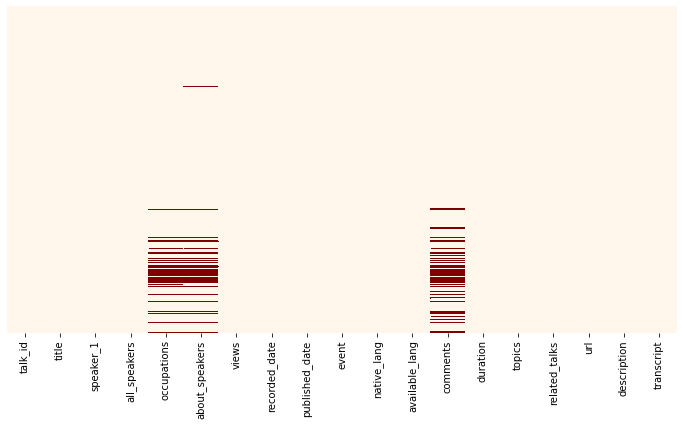

In [ ]:
#checking the missing data in the dataset
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have missing values in several columns which needs to be treated after EDA.

Here many columns have the data in the form of a string and dictionaries. To access the data and to build model, we should have cleaned data which can be easily accessed. So we are converting all columns to its proper datatype.

In [ ]:
#filling NA with other
tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)

#to convert from str to dict
tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)

#to extract the dict values
tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))

#filling the NA's with 'Not specified'
tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)

#to convert from str to dict
tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)

#to extract the dict values
tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))

#since dates are kind of discrete vaariables, we replace NA with mode.
tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)

#converting all the remaining columns which were in strings to their respective datatypes.
tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))



Here, some of the missing values are treated which missing value % was very less. Its done beacuse it will give better visualizations in our EDA.

In [ ]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance.

In [ ]:
tedtalk_df.info()   #Apart from the numeric column we are going to deal with all other missing values as its usefull for the EDA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   occupations     4005 non-null   object 
 3   about_speakers  4005 non-null   object 
 4   views           4005 non-null   int64  
 5   recorded_date   4005 non-null   object 
 6   published_date  4005 non-null   object 
 7   event           4005 non-null   object 
 8   native_lang     4005 non-null   object 
 9   available_lang  4005 non-null   object 
 10  comments        3350 non-null   float64
 11  duration        4005 non-null   int64  
 12  topics          4005 non-null   object 
 13  related_talks   4005 non-null   object 
 14  description     4005 non-null   object 
 15  transcript      4005 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 500.8+ KB


Date, month and year columns are converted to its proper Datetime datatype.

In [ ]:
#converting the published and recorded date as datetime datatype
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')


In [ ]:
#finding out the respected day,month and year
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)


In [ ]:
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)

#again converting the month which was in numbers to exact month names
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)


In [ ]:
tedtalk_df.head()

title         speaker_1  \
0      Averting the climate crisis           Al Gore   
1  The best stats you've ever seen      Hans Rosling   
2                 Simplicity sells       David Pogue   
3              Greening the ghetto     Majora Carter   
4      Do schools kill creativity?  Sir Ken Robinson   

                              occupations  \
0                      [climate advocate]   
1  [global health expert; data visionary]   
2                  [technology columnist]   
3    [activist for environmental justice]   
4                      [author, educator]   

                                      about_speakers     views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...   3523392    2006-02-25   
1  In Hans Rosling’s hands, data sings. Global tr...  14501685    2006-02-22   
2  David Pogue is the personal technology columni...   1920832    2006-02-24   
3  Majora Carter redefined the field of environme...   2664069    2006-02-26   
4  Creativity expert Sir Ken Robinson challenges ...  65051954    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0       977   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     628.0      1190   
2  [ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...     124.0      1286   
3  [ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...     219.0      1116   
4  [af, ar, az, be, bg, bn, ca, cs, da, de, el, e...    4931.0      1164   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   
2  [computers, entertainment, interface design, m...   
3  [MacArthur grant, activism, business, cities, ...   
4  [children, creativity, culture, dance, educati...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript release_day  \
0  Thank you so much, Chris. And it's truly a gre...     Tuesday   
1  About 10 years ago, I took on the task to teac...     Tuesday   
2  (Music: "The Sound of Silence," Simon & Garfun...     Tuesday   
3  If you're here today — and I'm very happy that...     Tuesday   
4  Good morning. How are you? (Audience) Good. It...     Tuesday   

  release_month  release_year  
0          June          2006  
1          June          2006  
2          June          2006  
3          June          2006  
4          June          2006

#**EDA**

# **Speaker_1** **column**

##**Speakers with top 20 total views wrt their number of talks**

In [ ]:
tedtalk_df['speaker_1'].nunique()

3274

In [ ]:
speaker_with_most_talks = pd.DataFrame(tedtalk_df['speaker_1'].value_counts()).reset_index()
speaker_with_most_talks.rename(columns={'index':'speaker_1', 'speaker_1':'num_of_talks'}, inplace=True)


speaker_total_views_df=tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).reset_index()
#speaker with respected total views
speaker_tv_df = speaker_total_views_df.head(20).sort_values('views',ascending=False)

speaker_report = speaker_with_most_talks.merge(speaker_total_views_df,on='speaker_1').reset_index()



In [ ]:
#taking only numeric columns to do the minmaxscaling
speaker_numeric = speaker_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(speaker_numeric)
#print(scaled)
speaker_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
speaker_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
speaker_report = speaker_report.head(20)

Text(0.5, 1.0, 'Speaker with top 10 total views and number_of_talks')

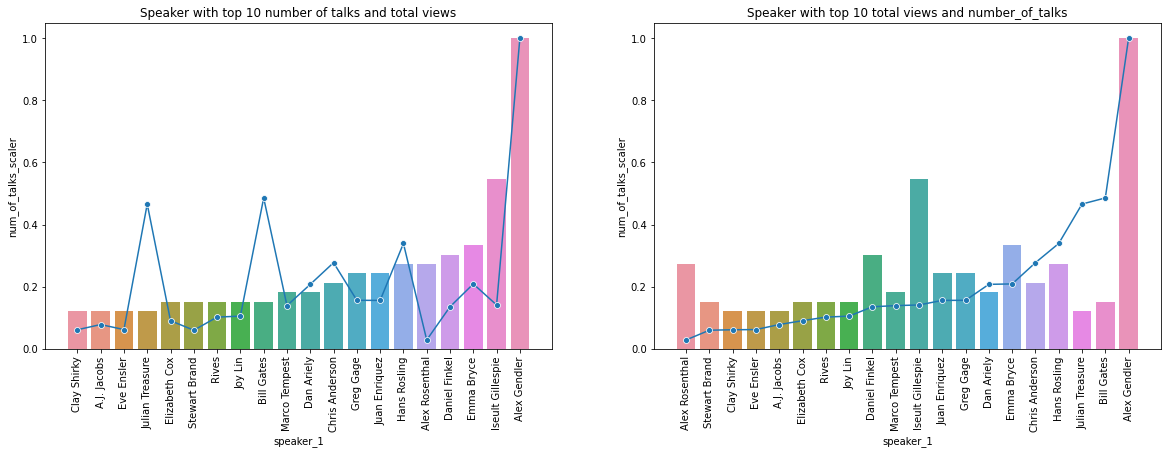

In [ ]:
# graph for speakers which has maximum talks with respect to views

# # plotting the graph

speaker_report_1 = speaker_report.sort_values('num_of_talks_scaler')
speaker_report_2 = speaker_report.sort_values('views')
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_1)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_1,marker='o')
plt.title('Speaker with top 10 number of talks and total views')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_2)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_2,marker='o')
plt.title('Speaker with top 10 total views and number_of_talks')
#speaker_report


We have the visualization for the same data from two different aspect here.


(1) First is the graph which contains Speakers who had given most number of talks. And the line graph represents their Views. 
We can observe that Bill Gates was the influenced person, so even if his number of talks are less, he has received more number of views. So the speaker influences the number of views fo the talks.We can see some hike in the graoh for the influenced speakers.

(2) Second is the graph which is sorted according to the Number of views talks received. We can observe that the number of talks is not directly contributing to the number of views talks can receive. 




## **Speaker who received more number of views for one video.**

In [ ]:
most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_1','views','title']]

speaker_1     views  \
4     Sir Ken Robinson  65051954   
1296         Amy Cuddy  57074270   
2062      James Veitch  56932551   
646        Simon Sinek  49730580   
796        Brené Brown  47544833   
1724   Julian Treasure  41504331   
2108         Tim Urban  37976820   
1366   Cameron Russell  33874546   
2724         Sam Berns  33691484   
1898        Bill Gates  33521780   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability  
1724         How to speak so that people want to listen  
2108         Inside the mind of a master procrastinator  
1366  Looks aren't everything. Believe me, I'm a model.  
2724                     My philosophy for a happy life  
1898                 The next outbreak? We're not ready

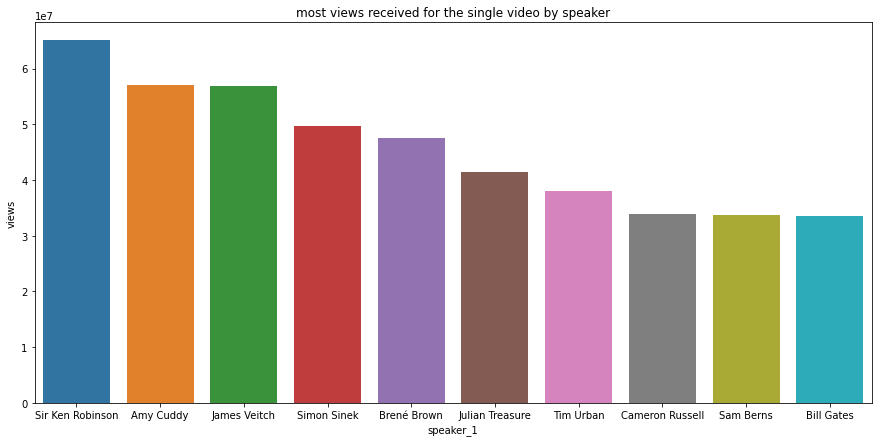

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most views received for the single video by speaker")
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

This graph represents the maximum views a single video received. Sir Ken Robinson is the one who received maximum number of views for a single video.

In [ ]:
#Extarcting the records of top 5 most viewed videos
pop_df=tedtalk_df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

speaker_1     views  \
4     Sir Ken Robinson  65051954   
1296         Amy Cuddy  57074270   
2062      James Veitch  56932551   
646        Simon Sinek  49730580   
796        Brené Brown  47544833   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability

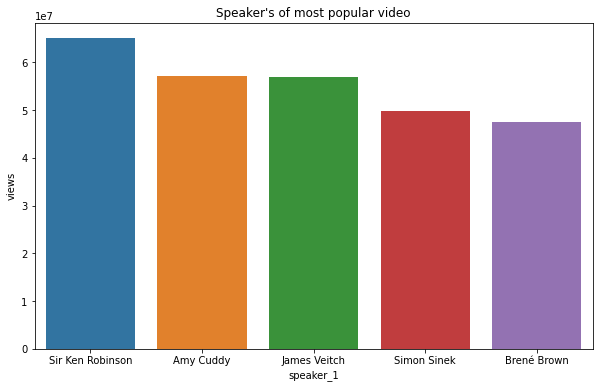

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.

It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views

There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

In [ ]:
#most popular speaker
pop_speaker_df = tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

speaker_1      views
0      Alex Gendler  117619583
1  Sir Ken Robinson   84380518
2      James Veitch   78843641
3       Simon Sinek   62661183
4       Brené Brown   61285977

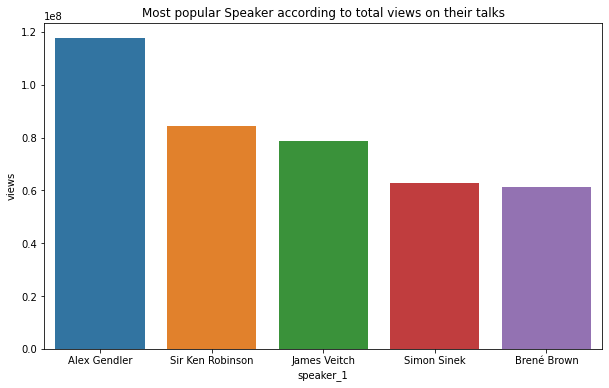

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

Alex Gendler is the most popular speaker followed by Sir Ken Robinson

#**Occupations column**

## **Top occupations of the speaker**

In [ ]:
tedtalk_df['speaker_occupation']=pd.Series()
for i in range(len(tedtalk_df)):
  tedtalk_df.loc[i,'speaker_occupation'] = tedtalk_df['occupations'][i][0]

In [ ]:
tedtalk_df['speaker_occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                   other
4002                          law researcher
4003                                   other
4004                                   other
Name: speaker_occupation, Length: 4005, dtype: object

In [ ]:
tedtalk_df['speaker_occupation'].nunique()

1552

We can observe that there are 1552 different occupations for the respective speakers in TED talk videos

In [ ]:
speaker_occupations_df = pd.DataFrame(tedtalk_df['speaker_occupation'].value_counts()).reset_index()
speaker_occupations_df.rename(columns={'index':'Occupations', 'speaker_occupation':'Number_of_speakers'}, inplace=True)

occupations_with_most_views = tedtalk_df.groupby(['speaker_occupation'],dropna=True)['views'].mean().reset_index()
occupations_with_most_views.rename(columns={'speaker_occupation':'Occupations', 'views':'views'}, inplace=True)

occupation_report = speaker_occupations_df.merge(occupations_with_most_views,on='Occupations')


In [ ]:
#taking only numeric columns to do the minmaxscaling
occupation_numeric = occupation_report[['Number_of_speakers','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(occupation_numeric)
#print(scaled)
occupation_report ['Number_of_speakers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
occupation_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Occupations with average views and respected number of speakers')

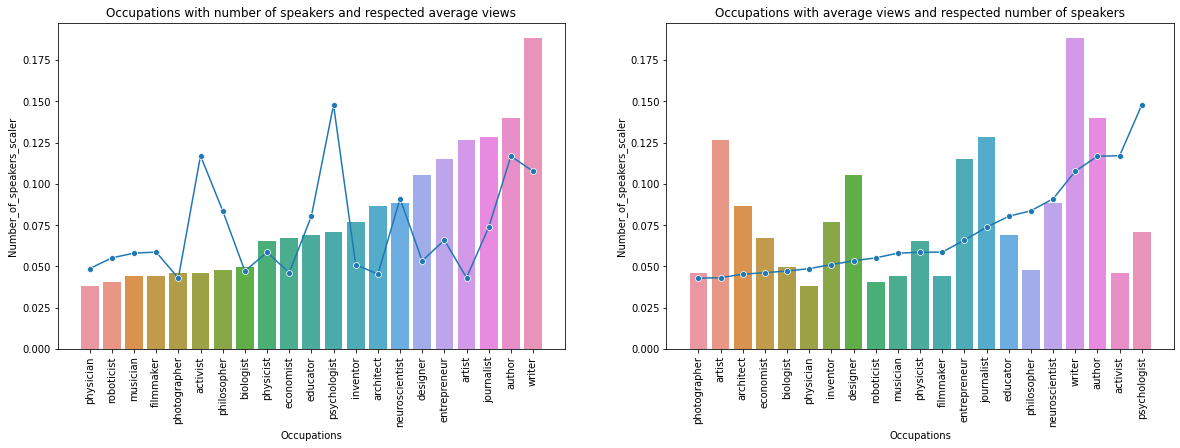

In [ ]:
# graph for occupation which has maximum talks with respect to views

# # plotting the graph

occupation_report_1 = occupation_report.sort_values('Number_of_speakers')
occupation_report_2 = occupation_report.sort_values('views')

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_1)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_1,marker='o')
plt.title('Occupations with number of speakers and respected average views')



plt.subplot(1, 2, 2)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_2)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_2,marker='o')
plt.title('Occupations with average views and respected number of speakers')


Again we have 2 representation of the same graphs, once sorted according to the number of talks then according to the number of views.

(1) In first graph, we can see that, again number of talks for the respective occupations are not directly contributing to the number of views. Instead the type of occupations are bringinfg a hike in number of views. For example, psychology (which everybody loves to listen about) and Activist (Who will make everybody listen to them by theri words). The occupations (might be their skills to talk to) does matter in number of views.

(2) Second graph contains the grapph which is sorted according to the number of views. We can See that the top 3 views were received by Psychologist, Activist and Author who all are very good in making people love what they speak.

In [ ]:
#replacing Nan values of occupations column with other 
for index, row in tedtalk_df.iterrows():
    if pd.isnull(row['speaker_occupation']):
        df['speaker_occupation'][index] = str({0:'Other'})

[Text(0.5, 1.0, "top 15 speaker's occupation")]

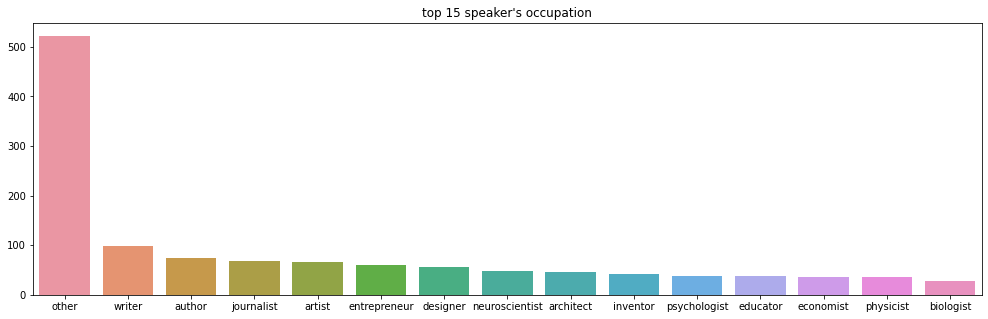

In [ ]:
occ_df= tedtalk_df[tedtalk_df['speaker_occupation']!='O']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occ_df['speaker_occupation'].value_counts(ascending=False).head(15).index, 
              y=occ_df['speaker_occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="top 15 speaker's occupation")

In [ ]:
occ_df['speaker_occupation'].value_counts()

other                          522
writer                          99
author                          74
journalist                      68
artist                          67
                              ... 
ornithologist                    1
macroencapsulator                1
gardener                         1
grassland ecosystem pioneer      1
law researcher                   1
Name: speaker_occupation, Length: 1552, dtype: int64

##**Occupations which received maximum number of views for a a single video.**

In [ ]:

most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_occupation','views','title']]

speaker_occupation     views  \
4                       author  65051954   
1296       social psychologist  57074270   
2062       comedian and writer  56932551   
646          leadership expert  49730580   
796   vulnerability researcher  47544833   
1724          sound consultant  41504331   
2108                   blogger  37976820   
1366                     model  33874546   
2724                  activist  33691484   
1898            philanthropist  33521780   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability  
1724         How to speak so that people want to listen  
2108         Inside the mind of a master procrastinator  
1366  Looks aren't everything. Believe me, I'm a model.  
2724                     My philosophy for a happy life  
1898                 The next outbreak? We're not ready

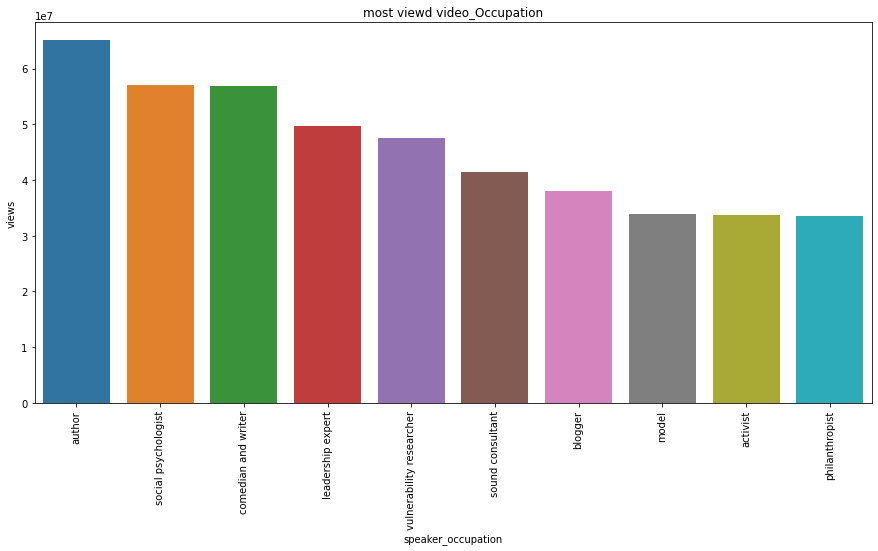

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most viewd video_Occupation")
plt.xticks(rotation=90)
sns.barplot(x='speaker_occupation',y='views',data=most_popular_video_df)

We can observe that the maximum number of views for a single video was received by the occuapttions Author followed by Psychologist.

#**Published date and released date**

##**Finding out on which day most of the videos were released**

In [ ]:
#creating a df which holds the number of talks on each day
talk_rel_day_df = pd.DataFrame(tedtalk_df['release_day'].value_counts()).reset_index()
talk_rel_day_df.rename(columns={'index':'release_day', 'release_day':'num_of_talks'}, inplace=True)

#creating another df which holds the record of views on each day
popular_day = tedtalk_df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

#merging both df
talk_day_report = talk_rel_day_df.merge(popular_day,on='release_day')

talk_day_report

release_day  num_of_talks         views
0     Tuesday           857  2.025352e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
3      Monday           727  1.953866e+06
4   Wednesday           703  2.293402e+06
5      Sunday            55  1.458068e+06
6    Saturday            42  9.821678e+05

Text(0.5, 1.0, 'Most frequent release days')

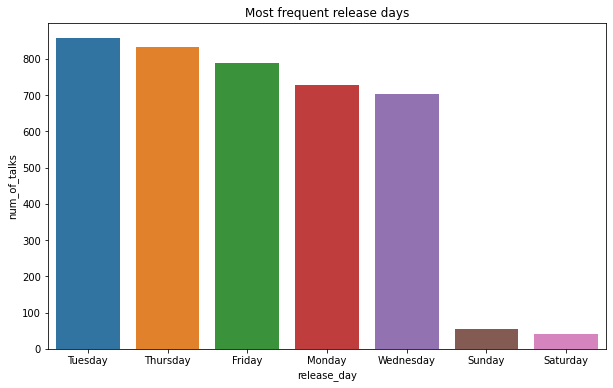

In [ ]:
# checking the day of the week having maximum release date 
plt.figure(figsize=(10,6))
sns.barplot(x='release_day',y='num_of_talks',data=talk_day_report)
plt.title('Most frequent release days')

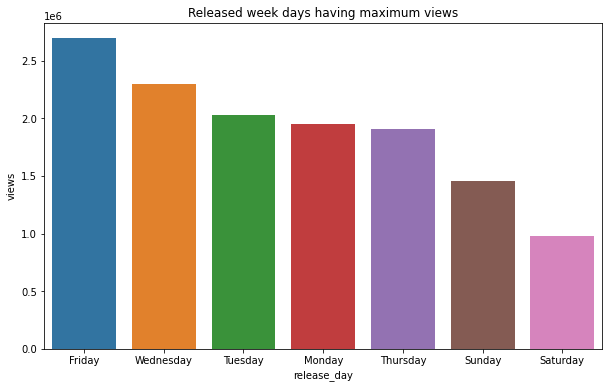

In [ ]:
#Days having maximum views
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=popular_day)

In [ ]:
#Sorting the days by using another dataframe with the day values

day_value = pd.DataFrame([['Sunday',0],['Monday',1],['Tuesday',2],['Wednesday',3],['Thursday',4],['Friday',5],['Saturday',6]])
day_value.rename(columns={0:'release_day',1:'Day_value'},inplace=True)
day_value
talk_day_report = talk_day_report.merge(day_value,on='release_day')

talk_day_report

release_day  num_of_talks         views  Day_value
0     Tuesday           857  2.025352e+06          2
1    Thursday           832  1.907994e+06          4
2      Friday           789  2.693812e+06          5
3      Monday           727  1.953866e+06          1
4   Wednesday           703  2.293402e+06          3
5      Sunday            55  1.458068e+06          0
6    Saturday            42  9.821678e+05          6

In [ ]:
# checking the day of the week having maximum release date 

talk_day_report = talk_day_report.sort_values('Day_value',ascending=True)
talk_day_report = talk_day_report.drop('Day_value',axis=True)
talk_day_report

release_day  num_of_talks         views
5      Sunday            55  1.458068e+06
3      Monday           727  1.953866e+06
0     Tuesday           857  2.025352e+06
4   Wednesday           703  2.293402e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
6    Saturday            42  9.821678e+05

Most videos are published on Tuesday followed by Thursday.

But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.

Friday release is impacting the views of the video

In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_day_numeric = talk_day_report[['num_of_talks','views']]
print(talk_day_numeric)
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_day_numeric)
#print(scaled)
talk_day_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_day_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

   num_of_talks         views
5            55  1.458068e+06
3           727  1.953866e+06
0           857  2.025352e+06
4           703  2.293402e+06
1           832  1.907994e+06
2           789  2.693812e+06
6            42  9.821678e+05


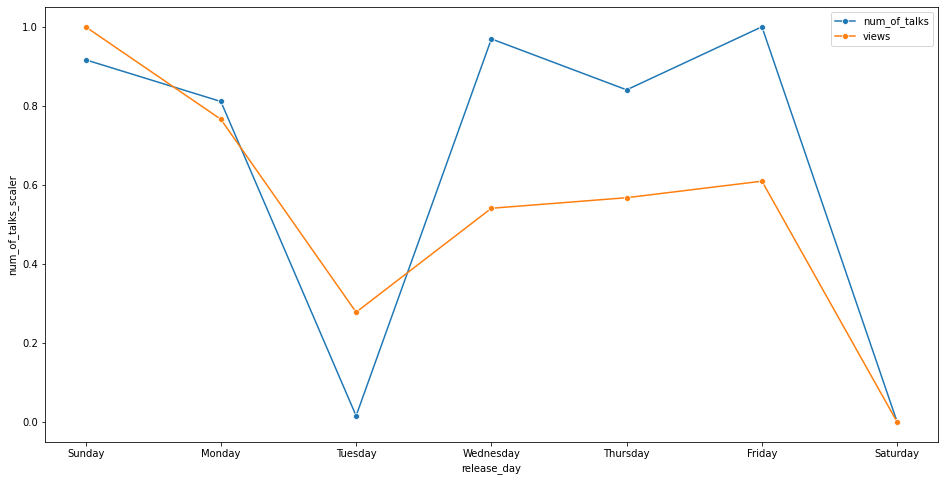

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_day_report.iloc[:,3:]:
  sns.lineplot(data=talk_day_report,x='release_day',y=i,marker='o')

plt.legend(labels=talk_day_numeric)

We can observe in this graph about the comparision of number of talks and as well as the number of views a particular day received. We can see that on saturday the number of talks and as well as the number of views were low. And on Sunday, Wednesday and Friday the release were high. But the number of views were high only on Sunday.

It may seem that only on weekends people were interested to give a time for TED talk videos.

## **Month**

In [ ]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=cd2f68f5b59ddc4d02595871dc4e198ca4644a7caceef0eda6522d78da89cb94
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=841903f388a35ddd79615c979dabaef2fb4523649eadba00c5b88bdd32002d14
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [ ]:
# creating data frame for num of talks in a particular month 
talk_rel_month_df = pd.DataFrame(tedtalk_df['release_month'].value_counts()).reset_index()
talk_rel_month_df.rename(columns={'index':'release_month', 'release_month':'num_of_talks'}, inplace=True)
talk_rel_month_df

release_month  num_of_talks
0          April           423
1          March           419
2            Feb           412
3            Oct           350
4            Jan           348
5            Sep           347
6            May           312
7           June           310
8            Nov           305
9           July           278
10           Dec           265
11           Aug           236

Text(0.5, 1.0, 'Most frequent release months')

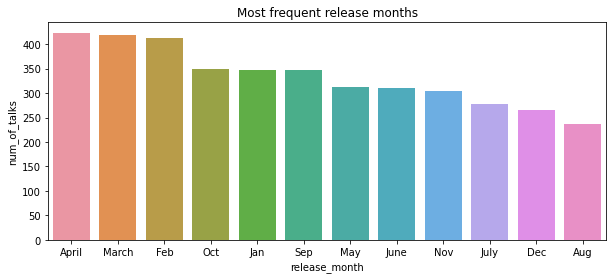

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='num_of_talks',data=talk_rel_month_df)
plt.title('Most frequent release months')

In [ ]:
#Printing the most popular release month according to average Views
popular_month = tedtalk_df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'}).sort_values('release_month').reset_index()

#merging two dataframes which has number of talks and views received in the same df
talk_month_report = talk_rel_month_df.merge(popular_month,on='release_month')

#sorting according to month in here
talk_month_report = Sort_Dataframeby_Month(df=talk_month_report ,monthcolumnname='release_month')



In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_month_numeric = talk_month_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_month_numeric)
#print(scaled)
talk_month_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_month_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
talk_month_report

release_month  num_of_talks         views  num_of_talks_scaler  \
0            Jan           348  2.014319e+06             0.598930   
1            Feb           412  2.135949e+06             0.941176   
2          March           419  2.644200e+06             0.978610   
3          April           423  2.180815e+06             1.000000   
4            May           312  2.449977e+06             0.406417   
5           June           310  2.125505e+06             0.395722   
6           July           278  2.127899e+06             0.224599   
7            Aug           236  1.884180e+06             0.000000   
8            Sep           347  2.224862e+06             0.593583   
9            Oct           350  1.909282e+06             0.609626   
10           Nov           305  1.746111e+06             0.368984   
11           Dec           265  2.109443e+06             0.155080   

    views_scaler  
0       0.298644  
1       0.434075  
2       1.000000  
3       0.484033  
4       0.783738  
5       0.422446  
6       0.425112  
7       0.153737  
8       0.533078  
9       0.181687  
10      0.000000  
11      0.404562

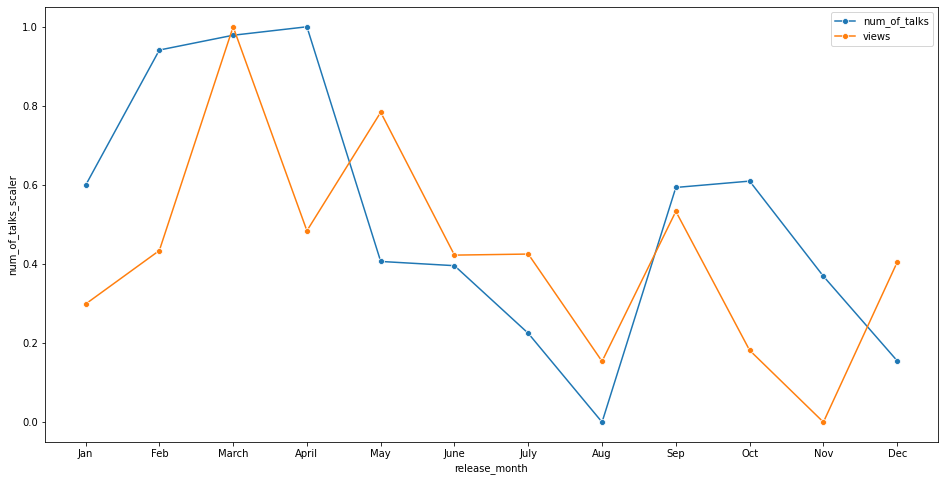

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_month_report.iloc[:,3:]:
  sns.lineplot(data=talk_month_report,x='release_month',y=i,marker='o')

plt.legend(talk_month_numeric)

Here we can observe that it has the comparision wise line graph for number of talks and number of views for the respective month.

Most number of videos were released in the month of April where the least were released in the month of August. But the number of views are maximum for the videos which were released in the month of March and least for the videos of November.



##**Year**

In [ ]:
talk_rel_year_df = pd.DataFrame(tedtalk_df['release_year'].value_counts()).reset_index()
talk_rel_year_df.rename(columns={'index':'release_year', 'release_year':'num_of_talks'}, inplace=True)

popular_year = tedtalk_df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'}).sort_values('release_year',ascending=False).reset_index()

talk_year_report = talk_rel_year_df.merge(popular_year,on='release_year').sort_values('release_year')


In [ ]:
talk_year_report = talk_rel_year_df.merge(popular_year,on='release_year').sort_values('release_year')
#taking only numeric columns to do the minmaxscaling
talk_year_numeric = talk_year_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_year_numeric)
#print(scaled)
talk_year_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_year_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
talk_year_report

release_year  num_of_talks         views  num_of_talks_scaler  \
14          2006            49  4.937003e+06             0.248086   
13          2007           119  1.848977e+06             1.000000   
12          2008           185  1.810979e+06             0.655436   
10          2009           215  2.071610e+06             0.295559   
8           2010           230  2.188767e+06             0.292496   
4           2011           255  1.932456e+06             0.277182   
3           2012           303  2.196281e+06             0.254211   
5           2013           242  3.012435e+06             0.315467   
7           2014           240  2.423564e+06             0.295559   
9           2015           220  2.806775e+06             0.261868   
6           2016           242  2.734725e+06             0.388974   
2           2017           315  2.160378e+06             0.208270   
1           2018           477  1.826209e+06             0.107198   
0           2019           702  1.939608e+06             0.000000   
11          2020           211  9.267452e+05             0.407351   

    views_scaler  
14      0.000000  
13      0.252568  
12      0.224291  
10      0.450839  
8       0.373247  
4       0.314698  
3       0.285484  
5       0.250785  
7       0.520089  
9       0.468805  
6       0.316572  
2       0.220493  
1       0.229968  
0       1.000000  
11      0.307619

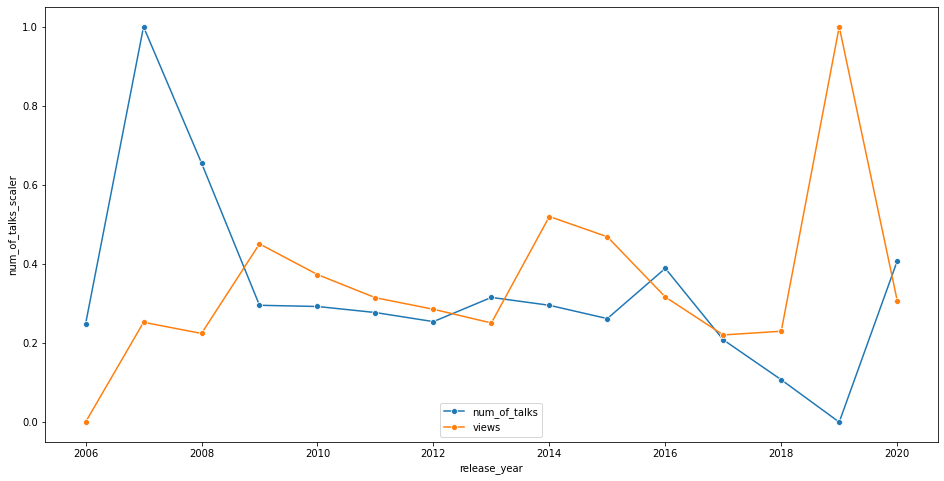

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_year_report.iloc[:,3:]:
  sns.lineplot(data=talk_year_report,x='release_year',y=i,marker='o')
plt.legend(labels=talk_year_numeric)

We can observe the line graph for almost 20 years of number of talks and number of views. We can conclude that Number of talks were morein old days but eventually it was reduced hit the minimum in 2019. It hits the hike in 2007 though. But the number of views were gradually increasing from year to year with a little bit of ups and downs. It was high during the 2019 when the number of talks were minimum.

##**To view the number of views received per day on monthly basis**

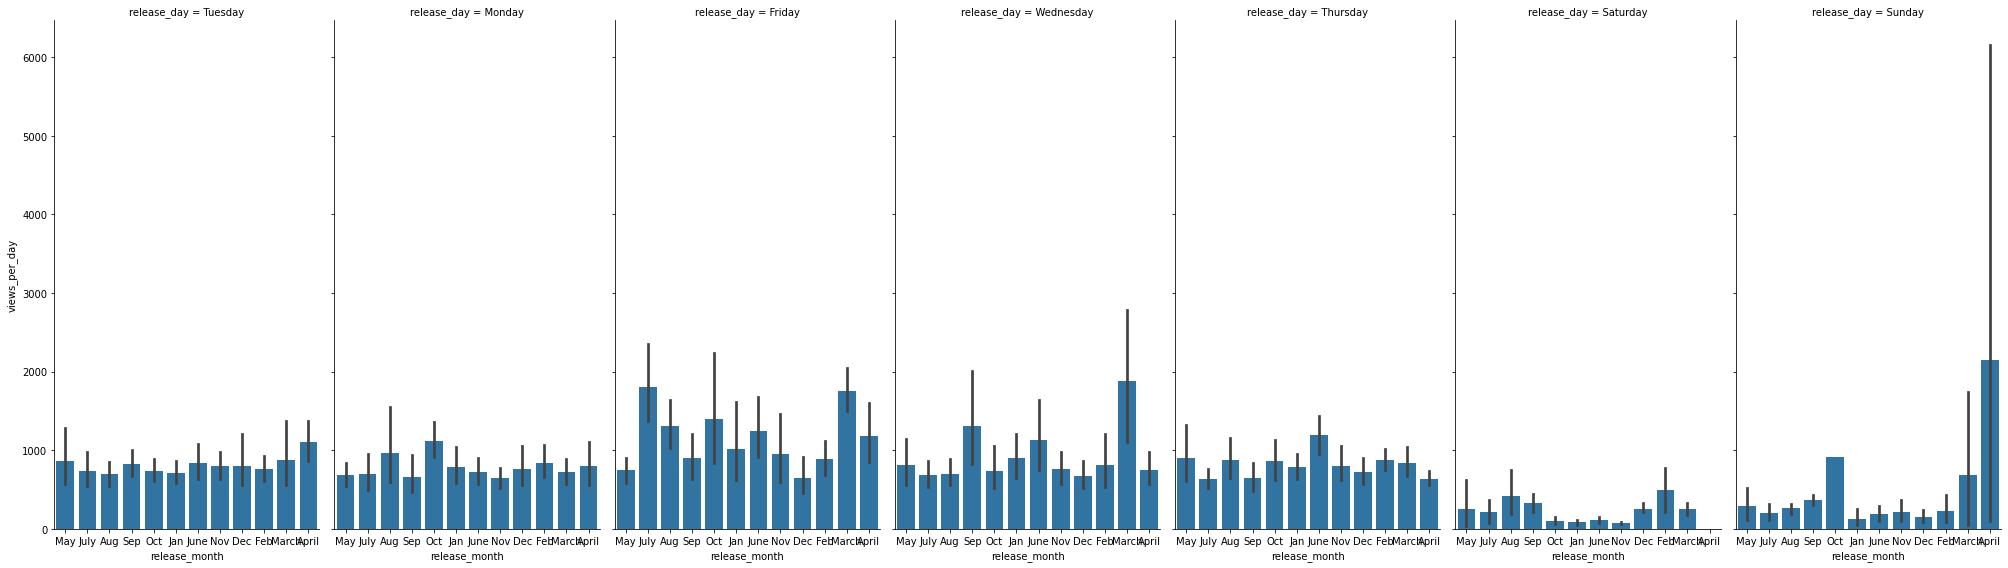

In [ ]:
from datetime import date
graph_df = tedtalk_df.copy()
g = sns.FacetGrid(graph_df, col='release_day', height=8, aspect=.5)
td = pd.to_datetime(date.today(), format='%Y-%m-%d')
graph_df['video_age'] = (td - tedtalk_df['published_date']).apply(lambda x: x.days)
graph_df['views_per_day'] = graph_df['views'] / ( graph_df['video_age'] + 1 )
g.map(sns.barplot, 'release_month', 'views_per_day')


#**Comment and duration columns**

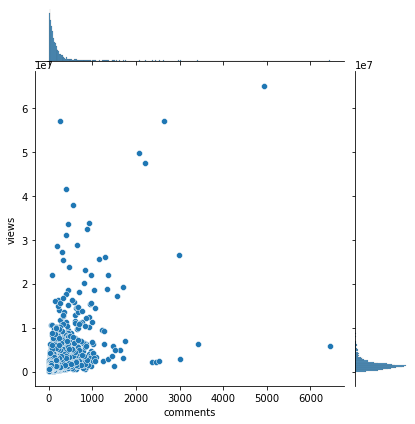

In [ ]:
sns.jointplot(data=tedtalk_df,x='comments', y='views')

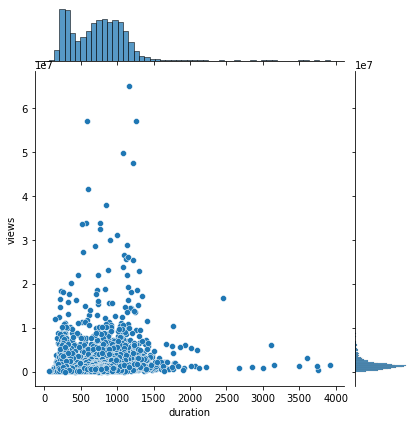

In [ ]:
sns.jointplot(data=tedtalk_df,x='duration', y='views')

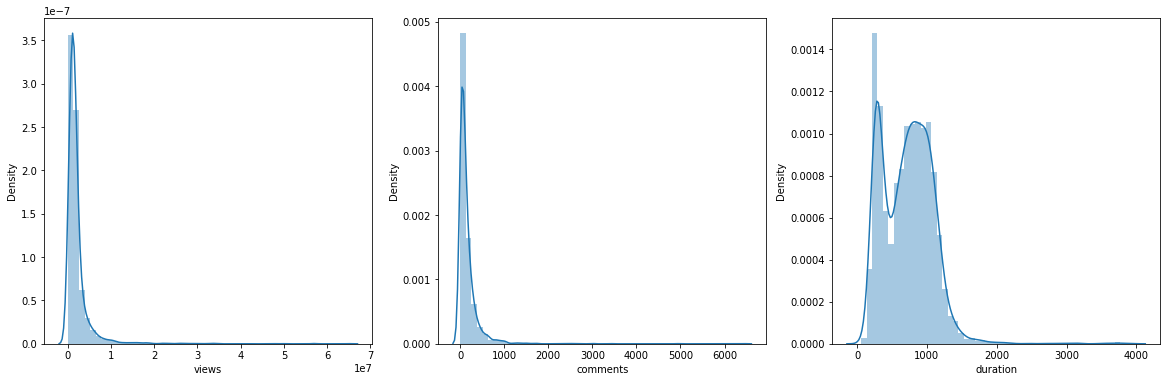

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(tedtalk_df['views'])
plt.subplot(1,3,2)
sns.distplot(tedtalk_df['comments'])
plt.subplot(1,3,3)
sns.distplot(tedtalk_df['duration'])


We can observe the data distribution of the numerical columns views , comments and duration.As shown from the graph 'views' feature  is positively skewed.




## **Events with respect to talks and views**

In [ ]:
#count of events

event_count_df = pd.DataFrame(tedtalk_df['event'].value_counts()).reset_index()
event_count_df.rename(columns={'index':'event', 'event':'num_of_talks'}, inplace=True)

#event with max views
popular_event=tedtalk_df[['event','views']].groupby('event').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

event_report = event_count_df.merge(popular_event,on='event')
event_report


event  num_of_talks         views
0               TED-Ed           556  2.059996e+06
1              TED2018            96  2.045275e+06
2              TED2017            96  2.373414e+06
3              TED2019            91  1.763375e+06
4              TED2014            84  2.860665e+06
..                 ...           ...           ...
454             TEDxBG             1  6.901730e+05
455       TEDxToulouse             1  1.065218e+06
456      TEDxGroningen             1  1.535646e+06
457  TEDxNorthwesternU             1  1.225343e+06
458           TEDxUMKC             1  1.598615e+06

[459 rows x 3 columns]

In [ ]:
#taking only numeric columns to do the minmaxscaling
event_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(event_numeric)
#print(scaled)
event_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
event_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))


Text(0.5, 1.0, 'Events with top 10 views followed by their number of talks')

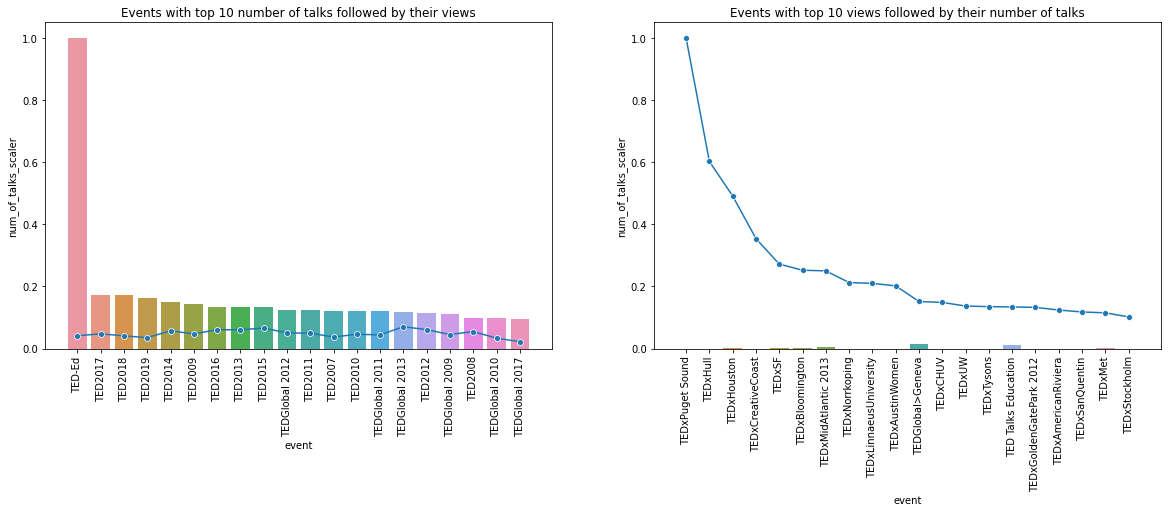

In [ ]:
# graph for event which has maximum talks with respect to views
event_talk_views_report_1 = event_report.sort_values('num_of_talks',ascending=False).head(20)
event_talk_views_report_2 = event_report.sort_values('views',ascending=False).head(20)
# # plotting the graph

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_1)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_1,marker='o')
plt.title('Events with top 10 number of talks followed by their views')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_2)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_2,marker='o')
plt.title('Events with top 10 views followed by their number of talks')


This graph represents the number of views for the different views along with the number of talks. We can observe that the count of number of talks of event did not really matter for views. For top 10 events in the first graph, the number of views is almost the same. And in the second graph, for the top 10 nummber of views, event's number of talks were very low. 

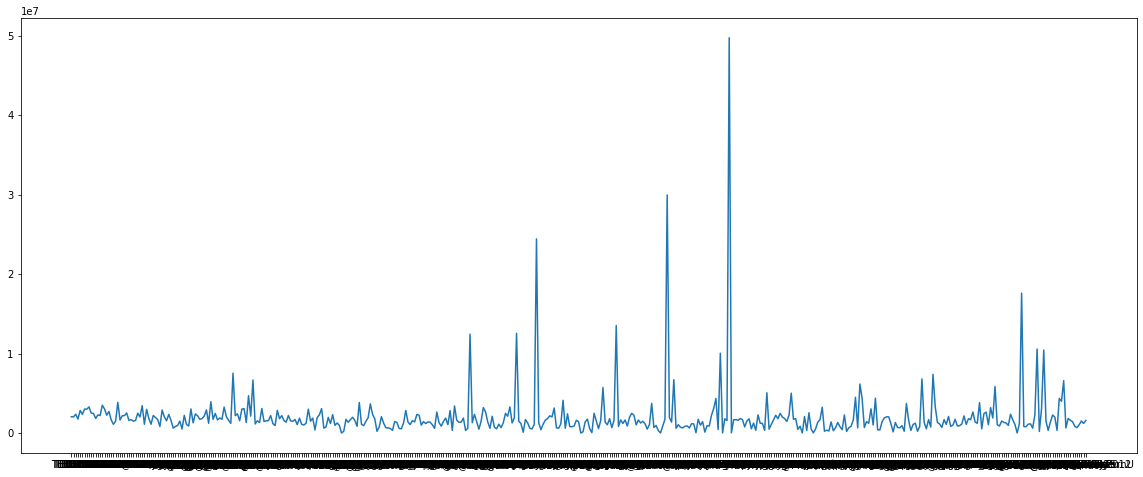

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(event_report['event'],event_report['views'])

This explains about the different events with respect to the number of views. And we can see some hikes in number of views for very few events in here. 

# **Native lang column**

In [ ]:
tedtalk_df['native_lang'].nunique()

12

In [ ]:
native_lang_df = pd.DataFrame(tedtalk_df['native_lang'].value_counts()).reset_index()

native_lang_df.rename(columns={'index':'native_lang', 'native_lang':'num_of_talks'}, inplace=True)

#event with max views
popular_lang=tedtalk_df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

lang_report = native_lang_df.merge(popular_lang,on='native_lang')


In [ ]:
#taking only numeric columns to do the minmaxscaling
lang_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(lang_numeric)
#print(scaled)
lang_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
lang_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

native_lang  num_of_talks         views  num_of_talks_scaler  views_scaler
0           en          3957  2.163597e+06             1.000000      0.041120
1           es            27  6.898032e+05             0.171171      0.040824
2           fr             9  9.825846e+05             0.171171      0.047425
3           ja             3  6.802843e+05             0.162162      0.035154
4           hi             2  5.768520e+05             0.149550      0.057226
5           de             1  8.848810e+05             0.144144      0.047162
6           pt             1  3.475180e+05             0.133333      0.060661
7           ko             1  2.057706e+06             0.133333      0.060288
8        zh-cn             1  1.368494e+06             0.133333      0.066117
9           ar             1  1.452611e+06             0.124324      0.050363
10       pt-br             1  1.167889e+06             0.124324      0.049576
11          it             1  3.466037e+06             0.120721      0.037102

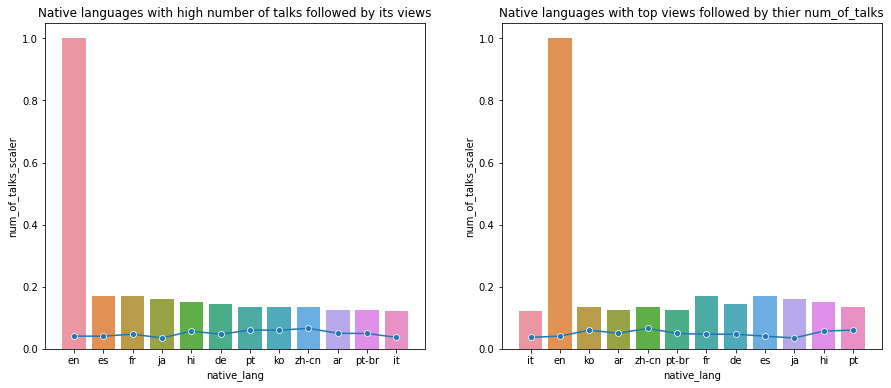

In [ ]:
# graph for langauges which has maximum talks with respect to views
#lang_report.sort_values('views',ascending=False,inplace=True)
# # plotting the graph
lang_report_1 = lang_report.sort_values('num_of_talks',ascending=False)
lang_report_2 = lang_report.sort_values('views',ascending=False)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_1)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_1,marker='o')
plt.title('Native languages with high number of talks followed by its views')

plt.subplot(1,2,2)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_2)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_2,marker='o')
plt.title('Native languages with top views followed by thier num_of_talks')

lang_report

We can see the different native languages avaliable, number of talks in those languages and number of views it received.
In the first graph we can see the charts which are sorted according to the number of talks. Obviously english being the common langauge, has most numer of talks. But it did not ensure about the number of views. The second graph contains the charts which are sorted according to number of views. And we can see that Portuguese has received maximum average views for its talks.

# **Available lang column**

## **subtitles count for all videos**

In [ ]:
lang_dict = {}
for i in tedtalk_df.to_dict('records'):
   tmp = i['available_lang']
   for j in tmp:
    if j in lang_dict:
      lang_dict[j] += 1
    else:
      lang_dict[j] = 1 
lang_df = pd.DataFrame(lang_dict.values(),index=lang_dict.keys(),columns=['count']).head(20).reset_index().sort_values('count',ascending=False)

lang_df

index  count
5      en   4005
6      es   3915
8      fr   3863
0      ar   3841
19     ko   3755
18     ja   3482
17     it   3459
12     he   3295
7      fa   3009
15     hu   2871
3      de   2698
4      el   2538
1      bg   2148
14     hr   1856
16     id   1733
2      cs   1543
13     hi    502
9   fr-ca    334
10     gl    323
11     gu    164

Text(0, 0.5, 'Counts')

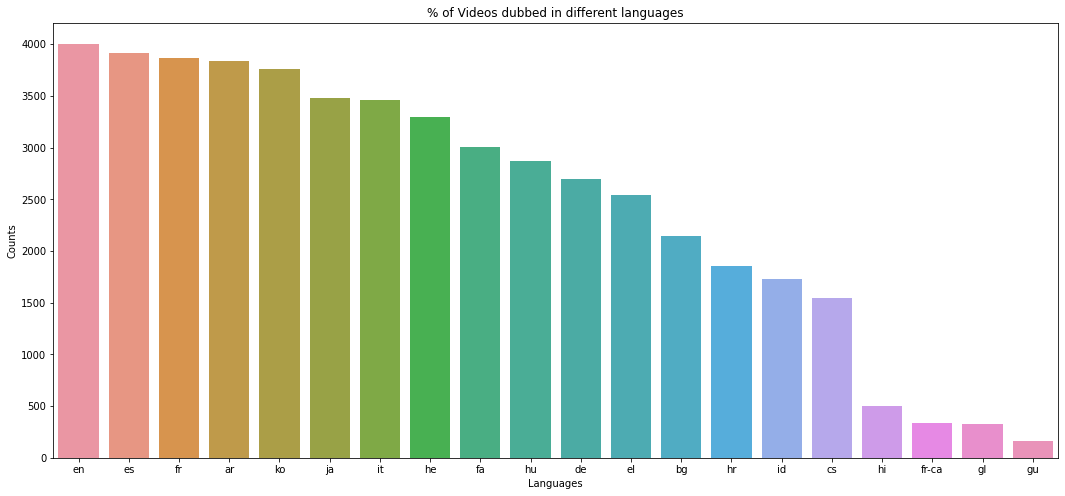

In [ ]:
plt.figure(figsize=(18,8))
plt.title('% of Videos dubbed in different languages')
ax = sns.barplot(x='index',y='count',data=lang_df)
plt.xlabel("Languages")
plt.ylabel('Counts')



This graphs gives the idea about how many languages were available as subtitles for the videos. And again English comes in top as its the common language all over the worls.

#**topics column**

In [ ]:
tedtalk_df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [ ]:
topics_df = pd.DataFrame(tedtalk_df['topics'].explode().value_counts().reset_index()).iloc[:,0:]
topics_df.rename(columns={'index':'Topics','topics':'Number_of_talks'},inplace=True)



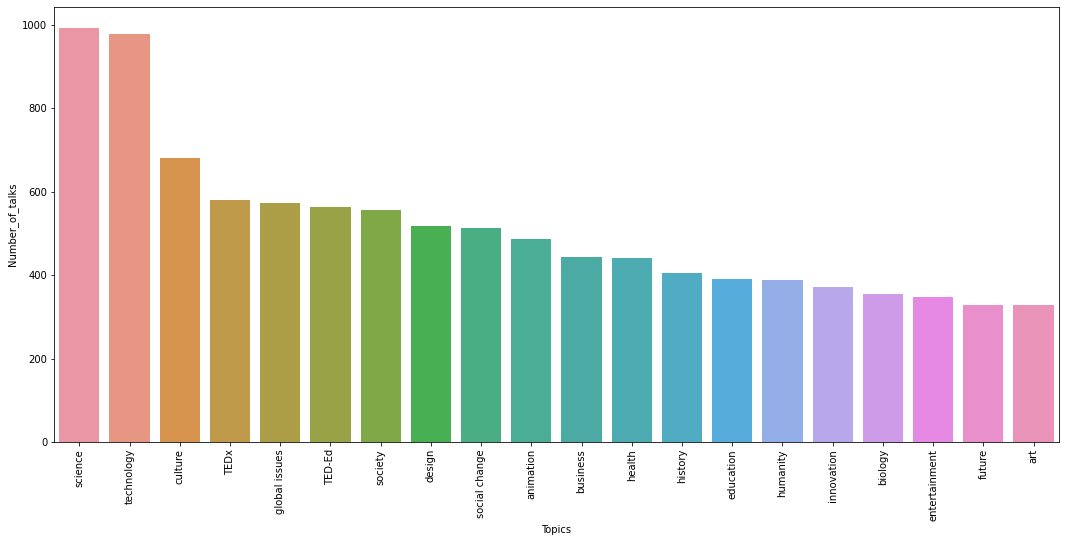

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x='Topics',y='Number_of_talks',data=topics_df.head(20))

We can see that the most talks in TED talk were about Science and technology.

##**Wordcloud for topics**

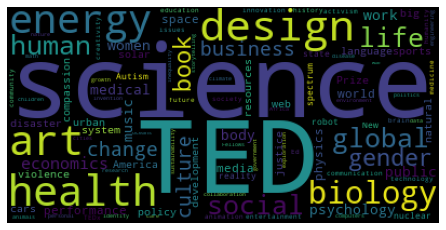

In [ ]:
from wordcloud import WordCloud
text = " ".join(topics_df['Topics'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'black').generate(text)

# Create and generate a word cloud image:
#wordcloud = WordCloud(background_color="yellow", width=900, height=600).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(word_cloud)
plt.show()



#**description column** 

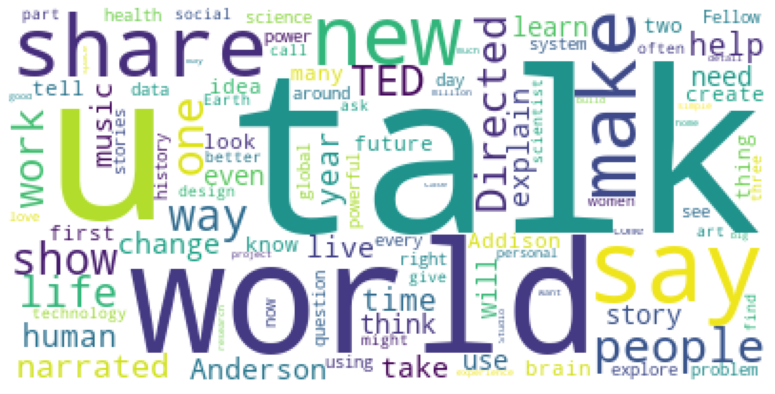

In [ ]:
text = " ".join(tedtalk_df['description'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**Title column**

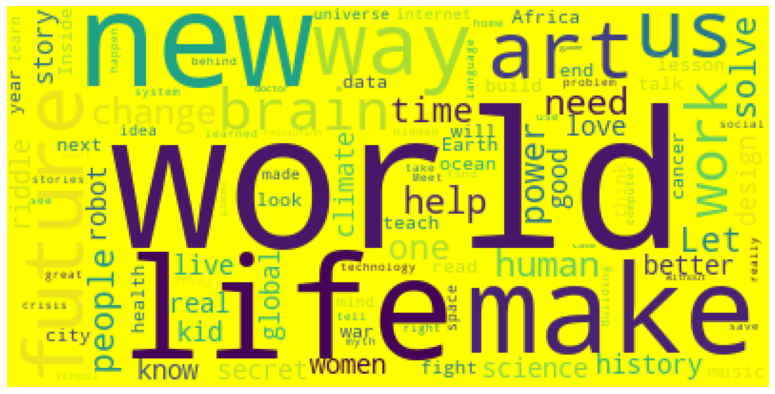

In [ ]:
text = " ".join(tedtalk_df['title'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'yellow').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**Heatmap**

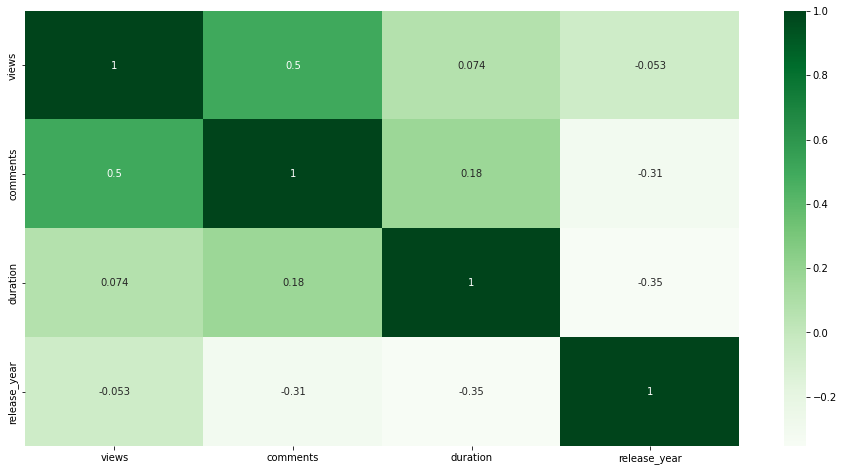

In [ ]:
plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

sns.heatmap(tedtalk_df.corr(),annot=True,cmap='Greens');

Trying to get a correlation matrix with visualization for the numeric columns. We can observe no 2 column share correlation more than 60%

In [ ]:
td_talk_df_2 = tedtalk_df.copy()

#**Missing values in  Comments**

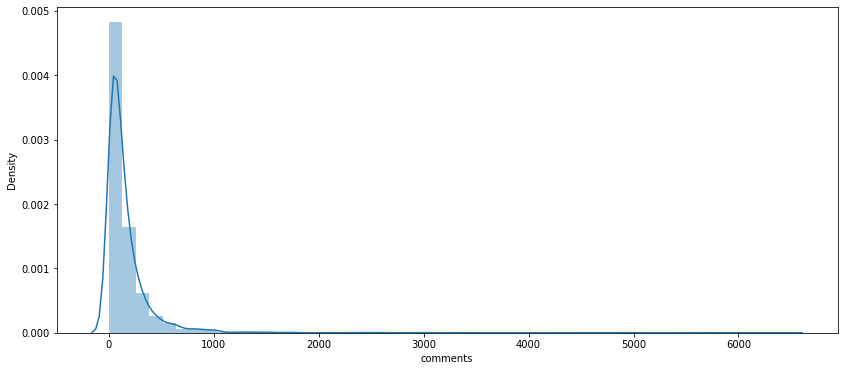

In [ ]:
sns.distplot(tedtalk_df.comments.dropna())

In [ ]:
numeric_df = tedtalk_df[['views','comments','duration']]

As more than 3% of the data were missing in Comments, we tried using the KNN imouter to predict the missing values in here.

In [ ]:
#KNN to find the missing values

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Doing dummy for categorical variables
numeric_df = pd.get_dummies(numeric_df)

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
numeric_df['comments'] = imputer.fit_transform((numeric_df['comments'].values.reshape(-1,1)))

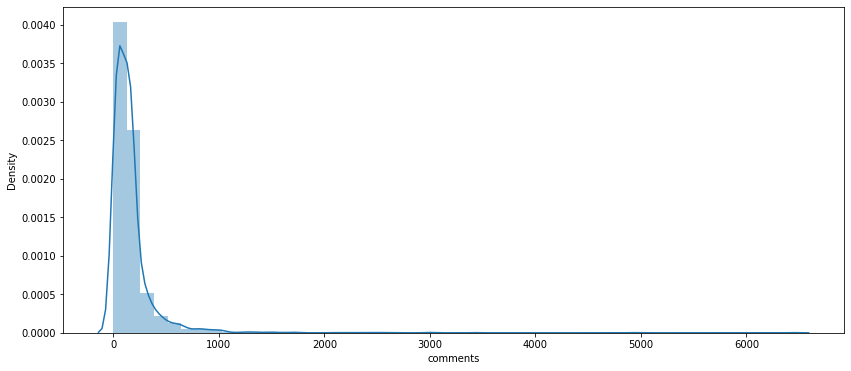

In [ ]:
sns.distplot(numeric_df['comments'])

In [ ]:
tedtalk_df['comments']=numeric_df['comments']
tedtalk_df.isna().sum()

title                 0
speaker_1             0
occupations           0
about_speakers        0
views                 0
recorded_date         0
published_date        0
event                 0
native_lang           0
available_lang        0
comments              0
duration              0
topics                0
related_talks         0
description           0
transcript            0
release_day           0
release_month         0
release_year          0
speaker_occupation    0
dtype: int64

In [ ]:
ted_talk_3_df = tedtalk_df.copy()


# **Handling** **Outliers**

In [ ]:
tedtalk_df.describe().T
#we can see that we have only numerical columns in here.
#talk_id is the unique number which should not be considered
#views is the dependent variable which should not be considered
# so we consider only comments and duration.

count          mean           std     min       25%        50%  \
views         4005.0  2.148006e+06  3.451226e+06     0.0  882069.0  1375508.0   
comments      4005.0  1.619970e+02  2.458684e+02     0.0      46.0      119.0   
duration      4005.0  7.240112e+02  3.617755e+02    60.0     393.0      738.0   
release_year  4005.0  2.014597e+03  3.991930e+00  2006.0    2011.0     2015.0   

                    75%         max  
views         2133110.0  65051954.0  
comments          162.0      6449.0  
duration          974.0      3922.0  
release_year     2018.0      2020.0

In [ ]:
continous = ['comments','duration']

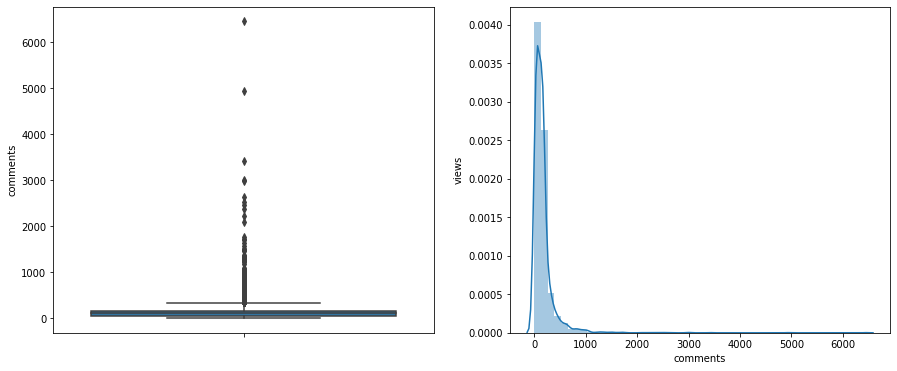

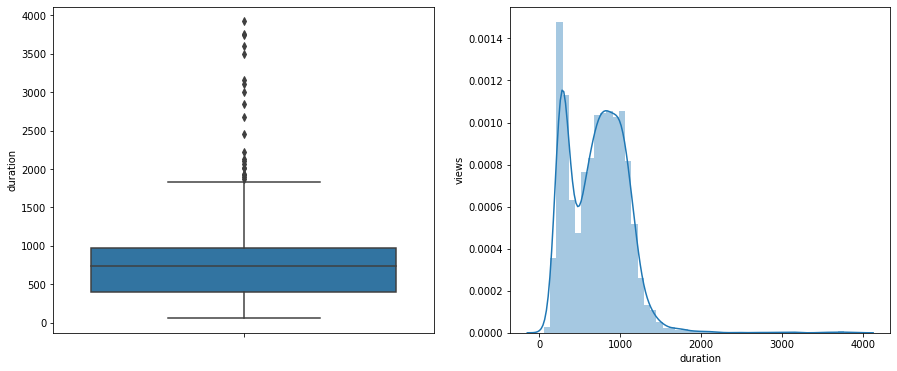

In [ ]:
for var in continous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=tedtalk_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(tedtalk_df[var])
    fig.set_ylabel('views')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
 tedtalk_df[['comments','duration']].describe().T


count        mean         std   min    25%    50%    75%     max
comments  4005.0  161.997015  245.868383   0.0   46.0  119.0  162.0  6449.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [ ]:

#comments
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['comments'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
tedtalk_df.loc[tedtalk_df['comments']>upper,'comments'] = upper

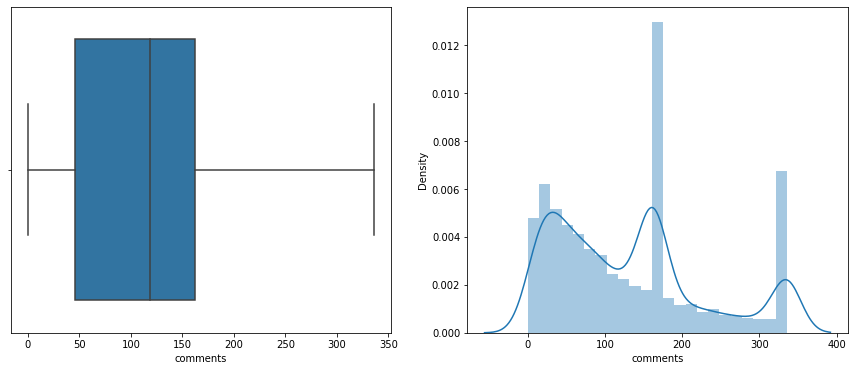

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['comments'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['comments'])

In [ ]:
tedtalk_df[['comments','duration']].describe().T

count        mean         std   min    25%    50%    75%     max
comments  4005.0  131.469175   98.182881   0.0   46.0  119.0  162.0   336.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [ ]:
#duration
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['duration'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
tedtalk_df.loc[tedtalk_df['duration']>upper,'duration'] = upper
#borderizing the outliers

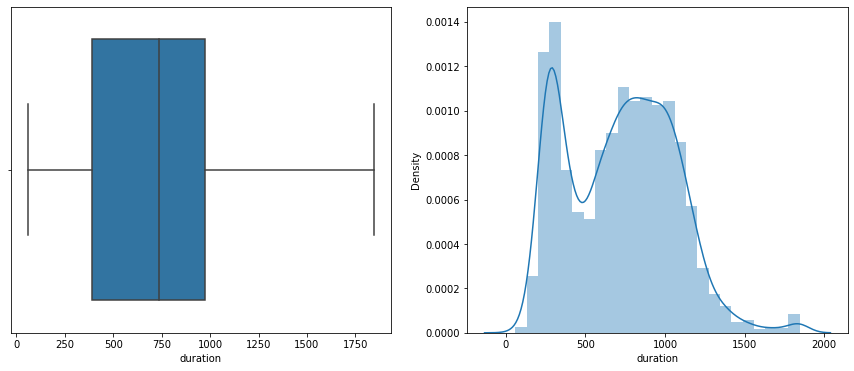

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['duration'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['duration'])
# plt.figure(figsize=(15,6))
# plt.subplot(1, 2, 1)
# sns.boxplot(tedtalk_df['duration'])
# plt.subplot(1, 2, 2)
# sns.distplot(tedtalk_df['duration'])

Here to treat outliers, we have used IQR method. Whatever the data were more than the Q3+1.5*IQR we tried equating it into upper range only. Only Comments and duration were treated this way. 

To treat outliers in views column which was a dependent column we tried using the Z score.

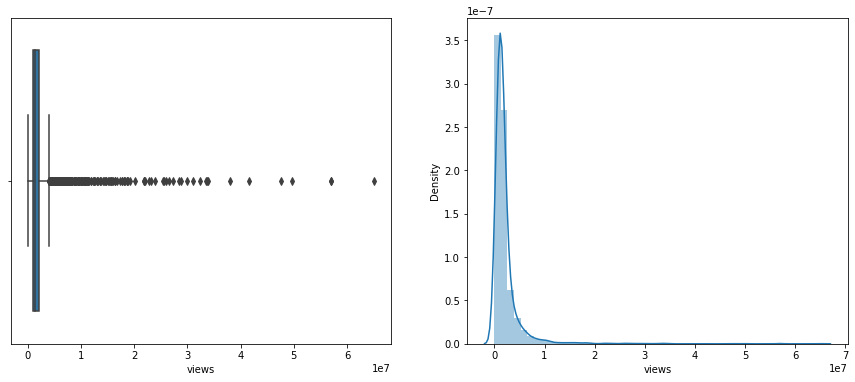

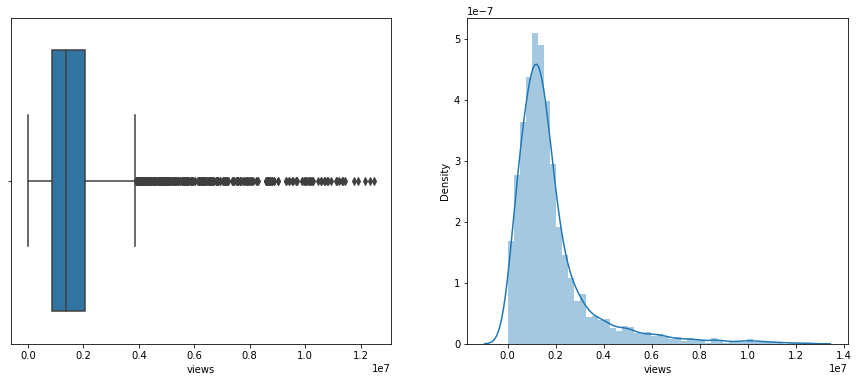

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])


tedtalk_df = tedtalk_df[((tedtalk_df['views'] - tedtalk_df['views'].mean()) / tedtalk_df['views'].std()).abs() < 3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])

In [ ]:
ted_talk_2_df = tedtalk_df.copy()
tedtalk_df = tedtalk_df.reset_index()
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3945 non-null   int64         
 1   title               3945 non-null   object        
 2   speaker_1           3945 non-null   object        
 3   occupations         3945 non-null   object        
 4   about_speakers      3945 non-null   object        
 5   views               3945 non-null   int64         
 6   recorded_date       3945 non-null   datetime64[ns]
 7   published_date      3945 non-null   datetime64[ns]
 8   event               3945 non-null   object        
 9   native_lang         3945 non-null   object        
 10  available_lang      3945 non-null   object        
 11  comments            3945 non-null   float64       
 12  duration            3945 non-null   float64       
 13  topics              3945 non-null   object      

# **Feature** **Engineering**

Now we start with the Feature engineering, we create a new variable from the existing one or we alter the existing variable into the new one to enhance the performance of the model.

In [ ]:
from datetime import date
today = pd.to_datetime(date.today(), format='%Y-%m-%d')


In [ ]:
#creating a column with video age
tedtalk_df['video_age'] = (today - tedtalk_df['published_date']).apply(lambda x: x.days)
# Creating a daily views column
tedtalk_df['views_per_day'] = tedtalk_df['views'] / ( tedtalk_df['video_age'] + 1 )

In [ ]:

#Finding average views according to first speaker
tedtalk_df['speaker_1_average_views'] = tedtalk_df['speaker_1'].map(list(tedtalk_df.groupby('speaker_1').agg({'views_per_day' : 'mean'}).
                                                         sort_values(['views_per_day'],ascending=False).to_dict().values())[0])

#Finding average views according to event 
tedtalk_df['event_average_views'] = tedtalk_df['event'].map(list(tedtalk_df.groupby('event').agg({'views_per_day' : 'mean'}).
                                                 sort_values(['views_per_day'],ascending=False).to_dict().values())[0])


In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(tedtalk_df)):
  temp=tedtalk_df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)

      
# Creating a dictionary with unique topics wrt average views
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp, count = 0, 0

  for i in range(0,len(tedtalk_df)):
    temp2=tedtalk_df['topics'][i]
    if(topic in temp2):
      temp+=tedtalk_df['views_per_day'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Creating a list and appending with average views wrt topic
topics_wise_average_views=[]
for i in range(0,len(tedtalk_df)):
  temp=0
  temp_topic=tedtalk_df['topics'][i]
  for element in temp_topic:
    temp+= unique_topics_avg_view_dict[element]
  
  topics_wise_average_views.append(temp//len(temp_topic))


In [ ]:

# Creating a new columns with average topic views
tedtalk_df['topics_wise_avg_views'] = pd.Series(topics_wise_average_views).values

# Creating a unique topics column which contain number of unique topics spoken on in an event
tedtalk_df['unique_topics'] = tedtalk_df['topics'].str.len()

In [ ]:
tedtalk_df['subtitles_count'] = tedtalk_df.available_lang.apply(lambda x: len(x))

#tedtalk_df['Telecasted_after'] = (tedtalk_df['published_date'] - tedtalk_df['recorded_date']).apply(lambda x: x.days)
#creating a new variable 'telecasted after' which holds the difference between published date and recorded date


In [ ]:
tedtalk_df.head()

index                                   title            speaker_1  \
0      0             Averting the climate crisis              Al Gore   
1      2                        Simplicity sells          David Pogue   
2      3                     Greening the ghetto        Majora Carter   
3      5  Behind the design of Seattle's library  Joshua Prince-Ramus   
4      6                       Letting go of God        Julia Sweeney   

                            occupations  \
0                    [climate advocate]   
1                [technology columnist]   
2  [activist for environmental justice]   
3                           [architect]   
4         [actor, comedian, playwright]   

                                      about_speakers    views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...  3523392    2006-02-25   
1  David Pogue is the personal technology columni...  1920832    2006-02-24   
2  Majora Carter redefined the field of environme...  2664069    2006-02-26   
3  Joshua Prince-Ramus is best known as architect...  1208138    2006-02-23   
4  Julia Sweeney creates comedic works that tackl...  4636596    2006-02-24   

  published_date    event native_lang  ... release_month  release_year  \
0     2006-06-27  TED2006          en  ...          June          2006   
1     2006-06-27  TED2006          en  ...          June          2006   
2     2006-06-27  TED2006          en  ...          June          2006   
3     2006-07-10  TED2006          en  ...          July          2006   
4     2006-07-10  TED2006          en  ...          July          2006   

                   speaker_occupation video_age views_per_day  \
0                    climate advocate      5998    587.329888   
1                technology columnist      5998    320.192032   
2  activist for environmental justice      5998    444.085514   
3                           architect      5985    201.827264   
4                               actor      5985    774.573338   

  speaker_1_average_views event_average_views topics_wise_avg_views  \
0              508.980774           358.78326                 666.0   
1              521.726303           358.78326                 603.0   
2              370.523606           358.78326                 662.0   
3              197.531755           358.78326                 650.0   
4              795.020955           358.78326                 792.0   

  unique_topics  subtitles_count  
0             9               43  
1             9               26  
2             9               35  
3             5               19  
4             9               31  

[5 rows x 28 columns]

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    3945 non-null   int64         
 1   title                    3945 non-null   object        
 2   speaker_1                3945 non-null   object        
 3   occupations              3945 non-null   object        
 4   about_speakers           3945 non-null   object        
 5   views                    3945 non-null   int64         
 6   recorded_date            3945 non-null   datetime64[ns]
 7   published_date           3945 non-null   datetime64[ns]
 8   event                    3945 non-null   object        
 9   native_lang              3945 non-null   object        
 10  available_lang           3945 non-null   object        
 11  comments                 3945 non-null   float64       
 12  duration                 3945 non-

In [ ]:
df = tedtalk_df[['comments','duration','release_day','release_month','release_year',
              'video_age','views_per_day','speaker_1_average_views','event_average_views','topics_wise_avg_views','unique_topics','subtitles_count']]
                 #taking only imp columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   release_day              3945 non-null   object 
 3   release_month            3945 non-null   object 
 4   release_year             3945 non-null   int64  
 5   video_age                3945 non-null   int64  
 6   views_per_day            3945 non-null   float64
 7   speaker_1_average_views  3945 non-null   float64
 8   event_average_views      3945 non-null   float64
 9   topics_wise_avg_views    3945 non-null   float64
 10  unique_topics            3945 non-null   int64  
 11  subtitles_count          3945 non-null   int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 370.0+ KB


In [ ]:
df.describe().T

count         mean          std          min  \
comments                 3945.0   129.010664    96.452268     0.000000   
duration                 3945.0   717.511787   338.555275    60.000000   
release_year             3945.0  2014.625602     3.988702  2006.000000   
video_age                3945.0  2854.854753  1445.237577   942.000000   
views_per_day            3945.0   814.454855   869.336548     0.000000   
speaker_1_average_views  3945.0   814.454855   794.476591     0.000000   
event_average_views      3945.0   814.454855   456.925070     9.495364   
topics_wise_avg_views    3945.0   847.870976   176.045324   429.000000   
unique_topics            3945.0     7.930038     3.896177     1.000000   
subtitles_count          3945.0    25.076299     8.837186     1.000000   

                                 25%          50%          75%          max  
comments                   46.000000   115.000000   161.997015   336.000000  
duration                  390.000000   735.000000   970.000000  1845.500000  
release_year             2011.000000  2015.000000  2018.000000  2020.000000  
video_age                1490.000000  2600.000000  4041.000000  5998.000000  
views_per_day             273.893752   550.189943  1065.441196  8621.370933  
speaker_1_average_views   299.849730   594.791264  1070.955354  7679.357198  
event_average_views       391.504680   775.014934  1248.309473  6241.457764  
topics_wise_avg_views     716.000000   822.000000   957.000000  1453.000000  
unique_topics               5.000000     7.000000    10.000000    33.000000  
subtitles_count            20.000000    25.000000    31.000000    73.000000

In [ ]:
df.columns

Index(['comments', 'duration', 'release_day', 'release_month', 'release_year',
       'video_age', 'views_per_day', 'speaker_1_average_views',
       'event_average_views', 'topics_wise_avg_views', 'unique_topics',
       'subtitles_count'],
      dtype='object')

Now that more variables are created in the abovve steps, we check for the outlier once again to make sure that our data is free of outliers.

In [ ]:
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])


In [ ]:
df.describe().columns

Index(['comments', 'duration', 'release_year', 'video_age', 'views_per_day',
       'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

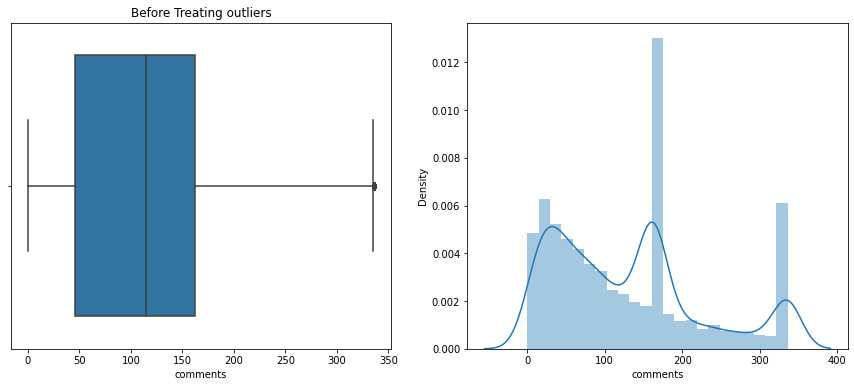

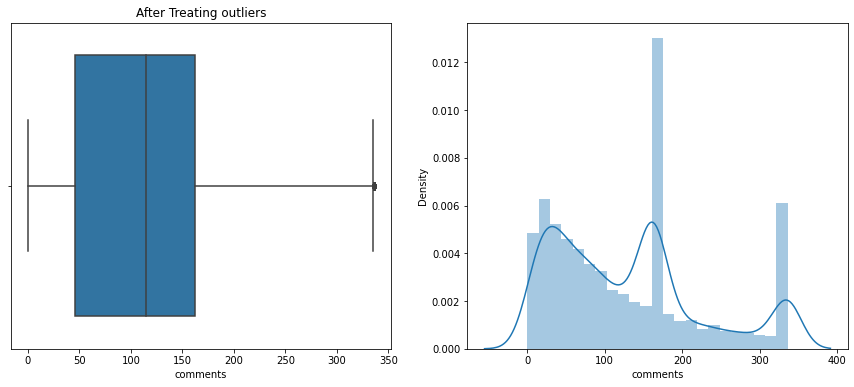

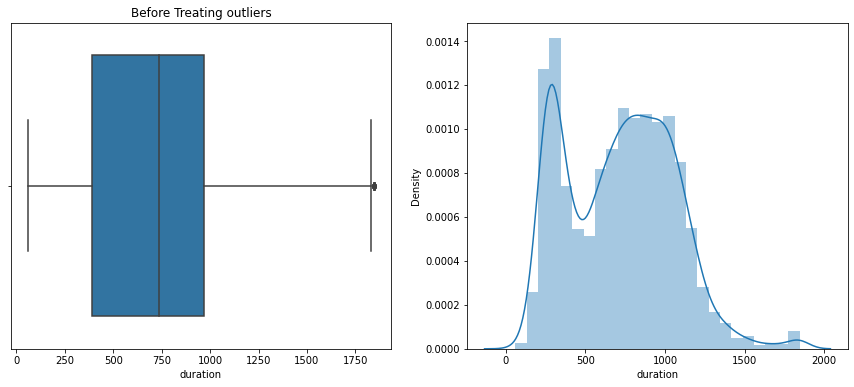

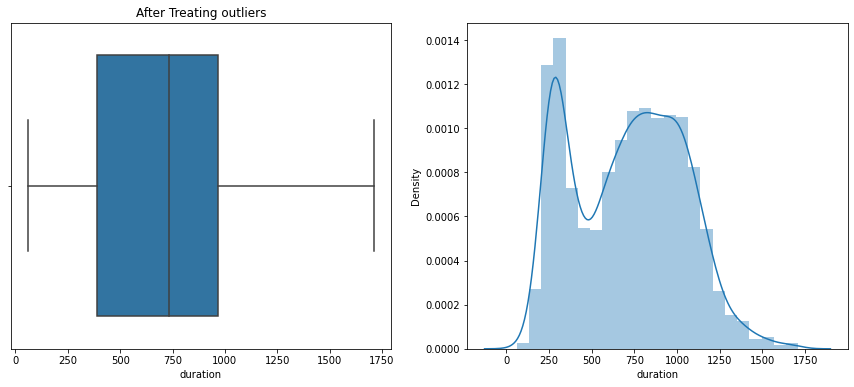

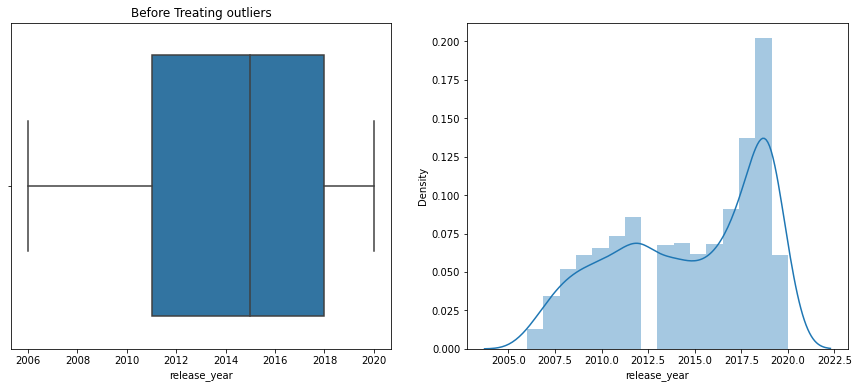

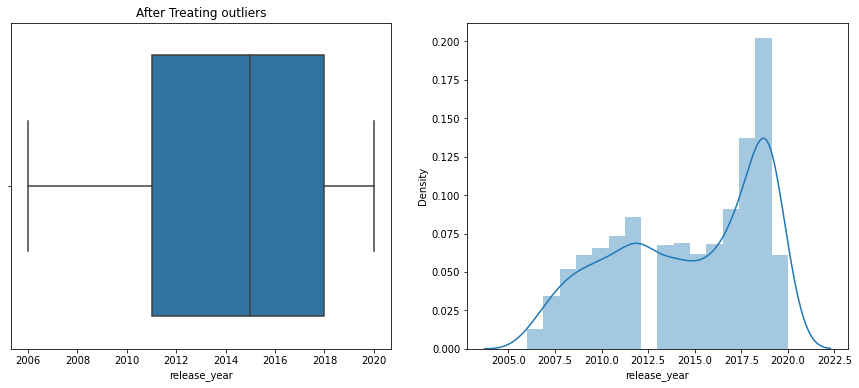

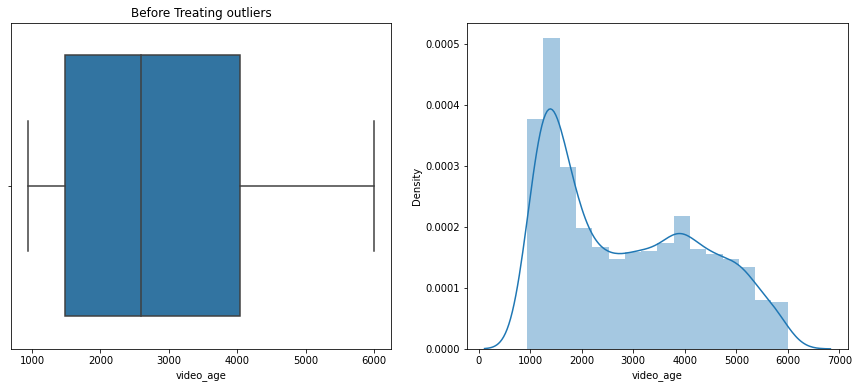

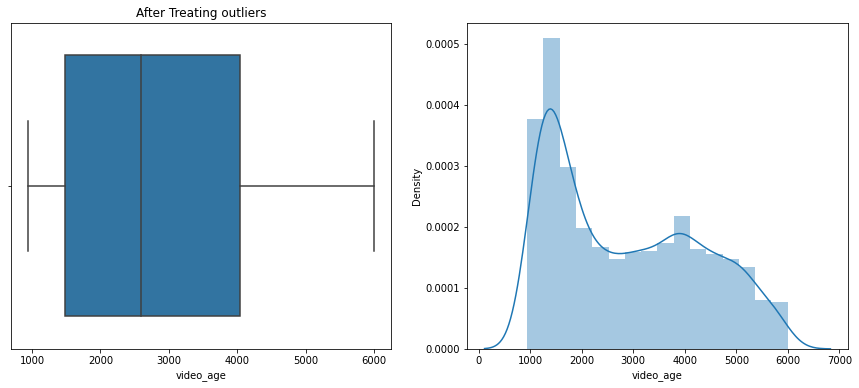

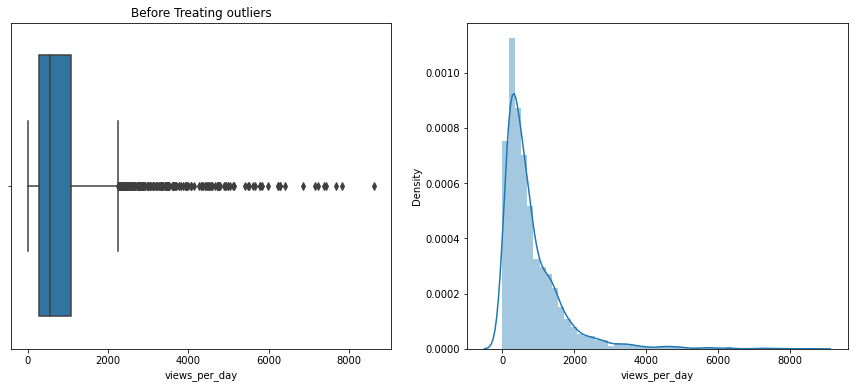

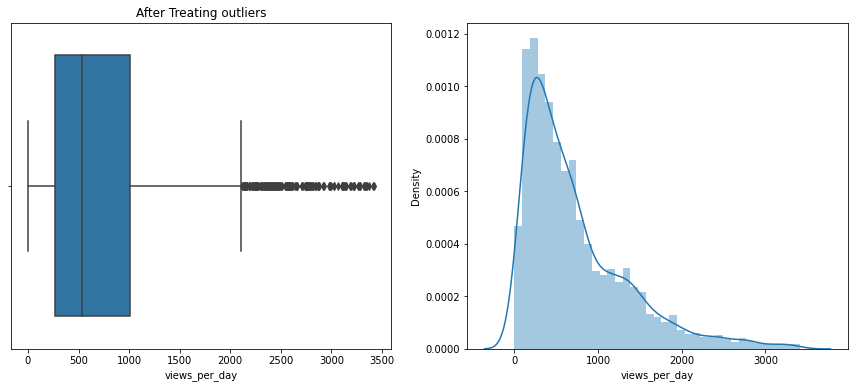

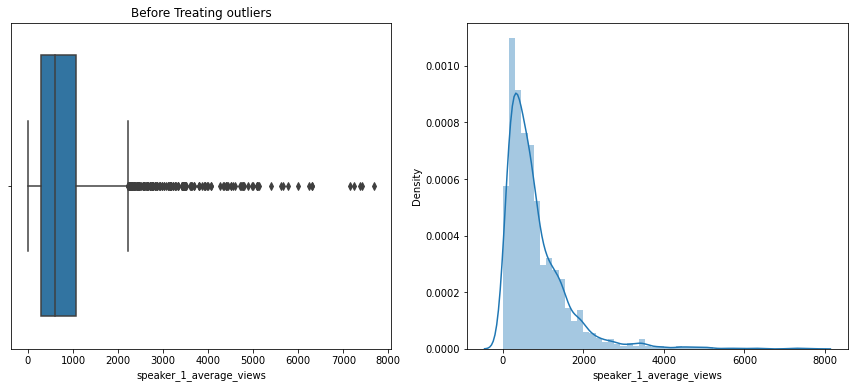

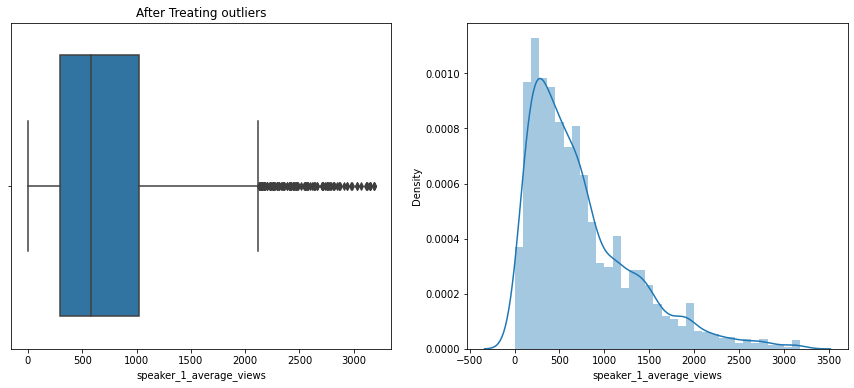

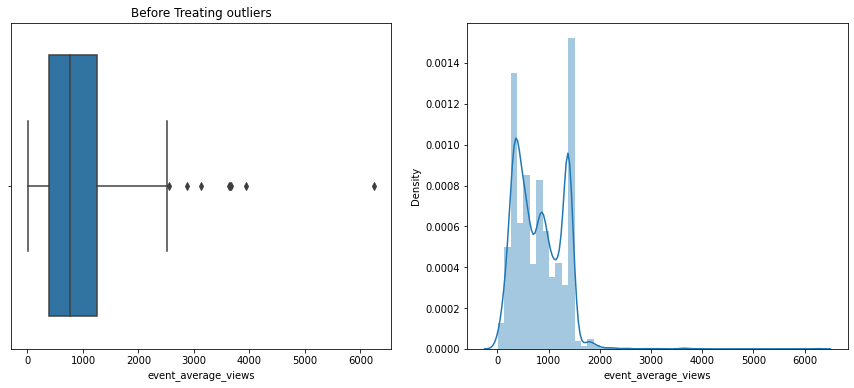

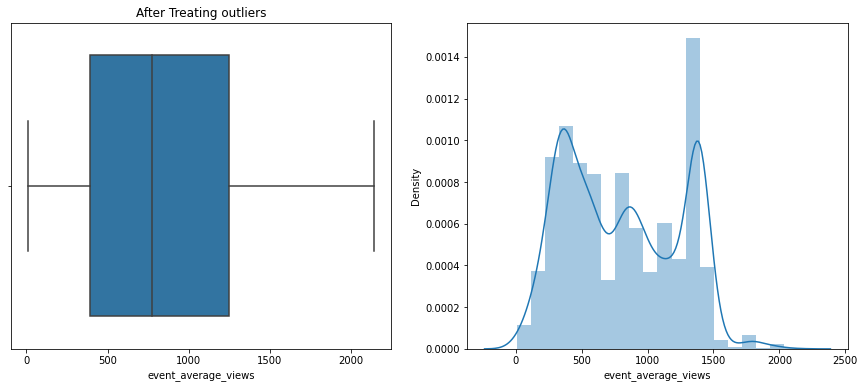

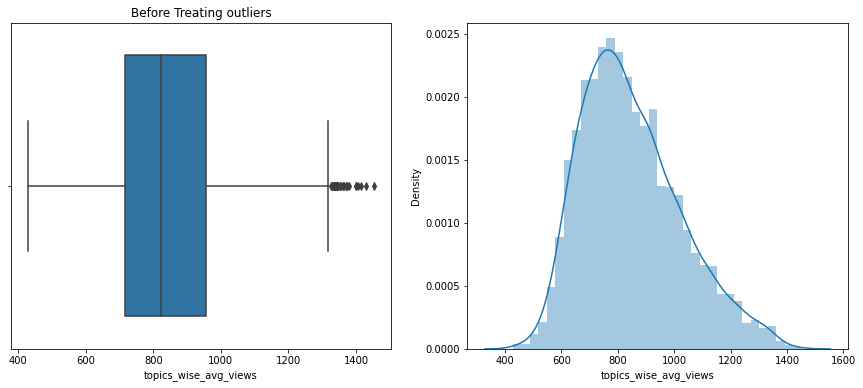

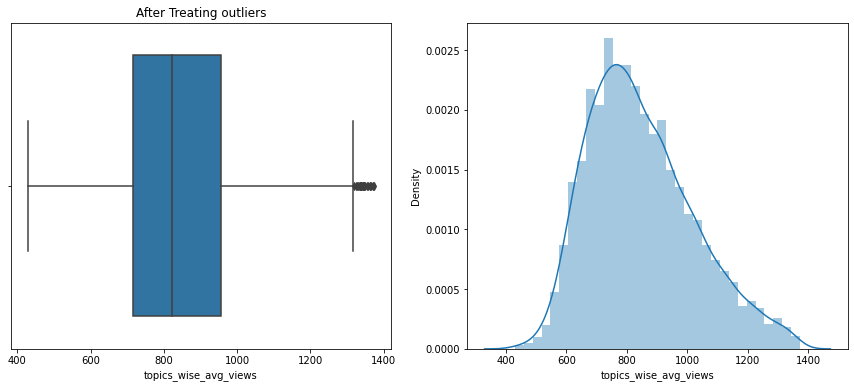

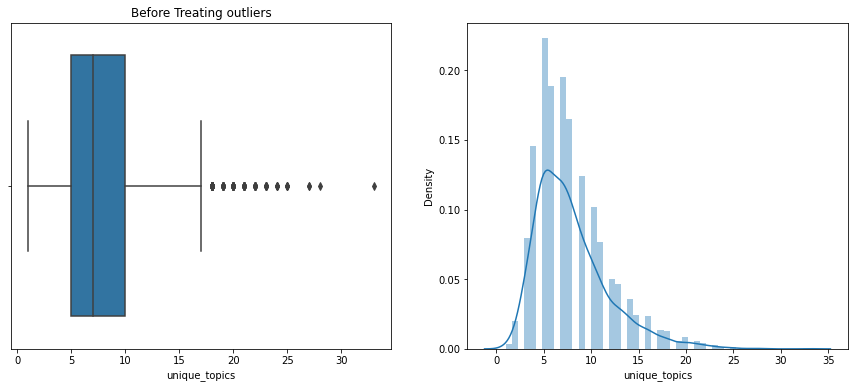

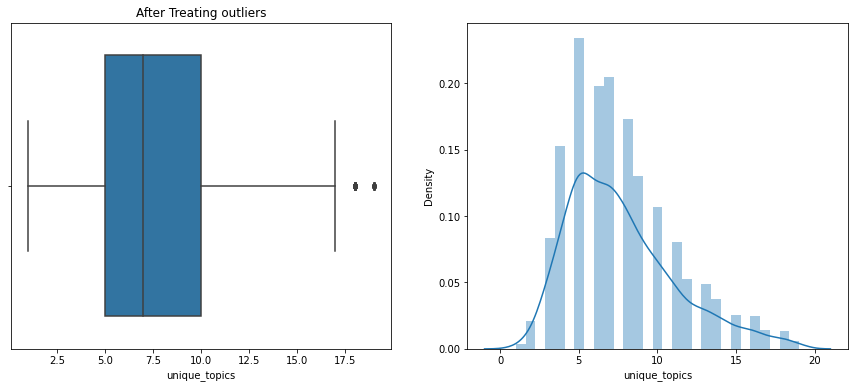

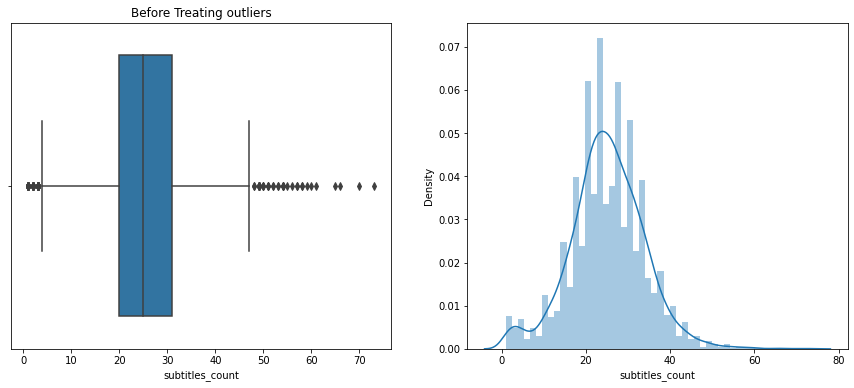

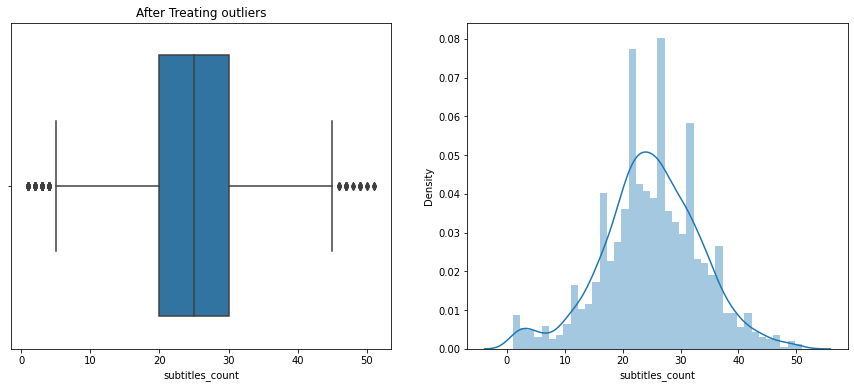

In [ ]:
for column in df.describe().columns:
  remove_outlier(df,column)

In [ ]:
df_2 = df.copy()

#**Checking the conditions for LR**

Now that Feature engineering is done, we need to start with train test split and start building our models. But since we are trying to start with linear regression in here, we need to check several criterias for LR.

In [ ]:
# defining in X and Y
y = df['views_per_day']
X = df.drop(columns=['views_per_day'])

In [ ]:
X.head(2)

comments  duration release_day release_month  release_year  video_age  \
0     272.0     977.0     Tuesday          June          2006       5998   
1     124.0    1286.0     Tuesday          June          2006       5998   

   speaker_1_average_views  event_average_views  topics_wise_avg_views  \
0               508.980774            358.78326                  666.0   
1               521.726303            358.78326                  603.0   

   unique_topics  subtitles_count  
0              9               43  
1              9               26

In [ ]:
#to check multicollinearity, normal distribution, we need only numerical data, we dont want categorical variable
X_without_categorical_variable  = X[['comments', 'duration','video_age', 'speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

# to check linearity with the dependent variable.
df_without_categorical_variable =  df[['comments', 'duration','video_age','views_per_day','speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

##**1)Checking linearity between the dependednt and independent variables**

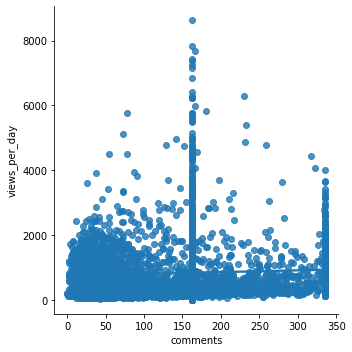

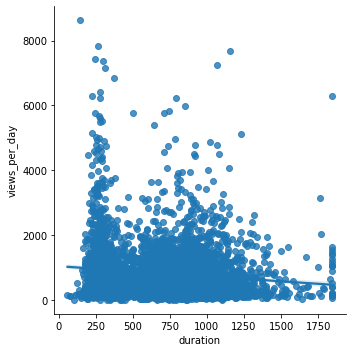

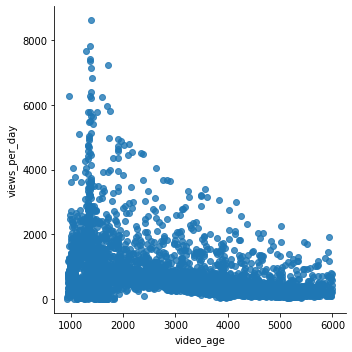

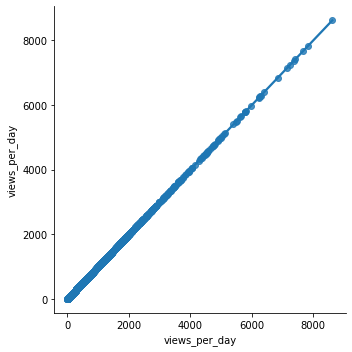

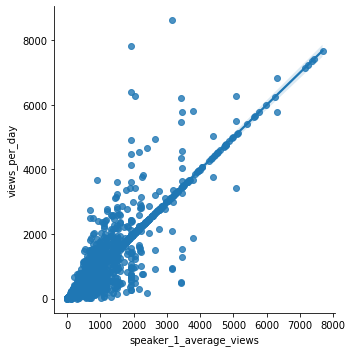

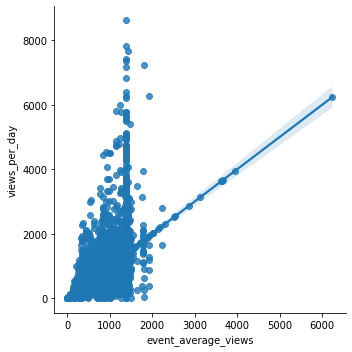

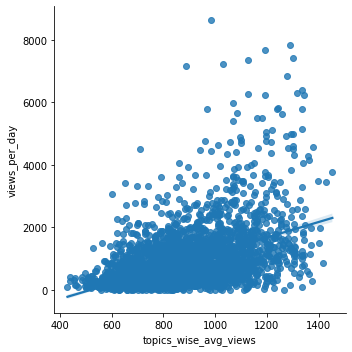

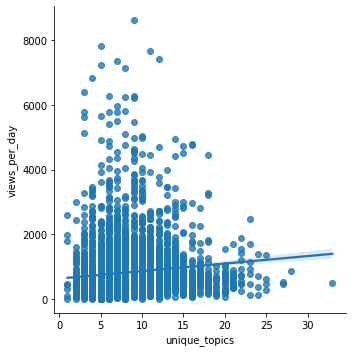

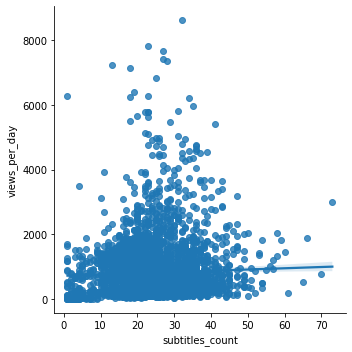

In [ ]:
for column in df_without_categorical_variable:
  sns.lmplot(x=column, y="views_per_day", data=df_without_categorical_variable, order=1)
# plt.ylabel('Target')
# plt.xlabel('Independent variable')

##**2) Multi collinearity should be vavoided**

In [ ]:
DF = X_without_categorical_variable.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
VIF_df = calc_vif(X[[i for i in DF.describe().columns ]])
VIF_df

variables        VIF
0                 comments   3.824941
1                 duration   7.316938
2                video_age  15.778893
3  speaker_1_average_views   3.266893
4      event_average_views   9.833306
5    topics_wise_avg_views  21.381754
6            unique_topics   5.441602
7          subtitles_count  16.597273

In [ ]:
calc_vif(DF[[i for i in DF.describe().columns if i not in ['video_age','topics_wise_avg_views','subtitles_count'] ]])
#trying to leave which ever had >10

variables       VIF
0                 comments  2.484235
1                 duration  3.840642
2  speaker_1_average_views  2.961333
3      event_average_views  4.958732
4            unique_topics  4.693707

By VIF factor we have kept only few of the columns with less VIF score.

##**3)All independednt variabels should be normally distributed**
Here we checking from QQ plot




## ***Applying Transformation***

In [ ]:
#As we have more number of varibales,trying to create a function which does the plotting and transformation.
#But be carefull as we have several variables with positively skewed data and 'not-normal' data.
#Whenever we have positively skewed data we need to use the log transformation. Or else we can use Boxcox transformation.

#import libraries
import scipy.stats as stats
import pylab

def to_plot(column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()


def log_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()

def box_cox_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(column)

def square_root_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/2)
  print("After Transformation")
  to_plot(column)

def exponential_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/1.2)
  print("After Transformation")
  to_plot(column)


def power_transform(column):
  print("Applying Power Transformation.\n Before Transformation")
  to_plot(column)
  # applying power transformation
  DF[column]=np.power(DF[column],1/2)
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()


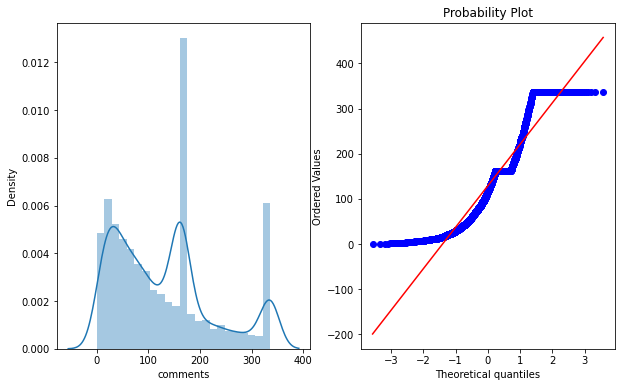

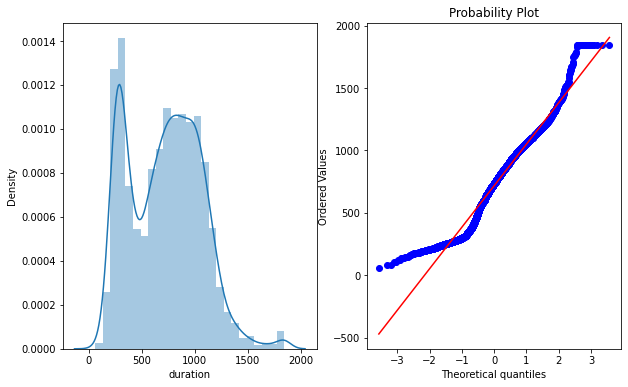

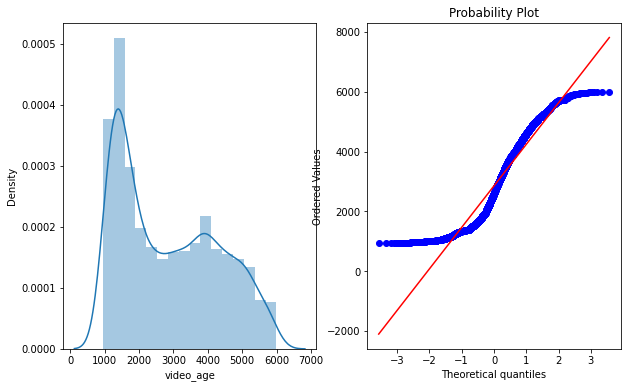

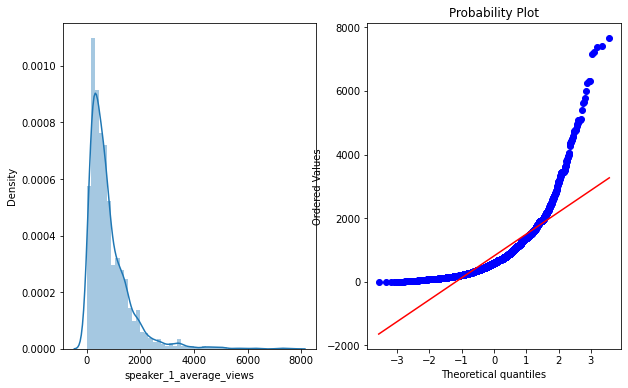

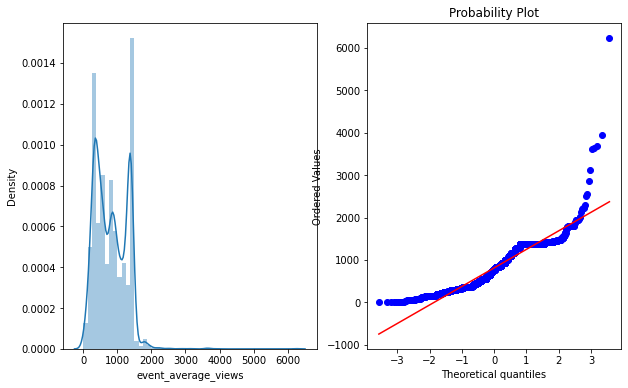

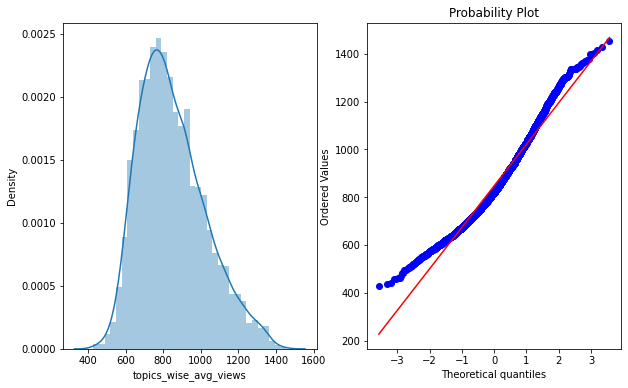

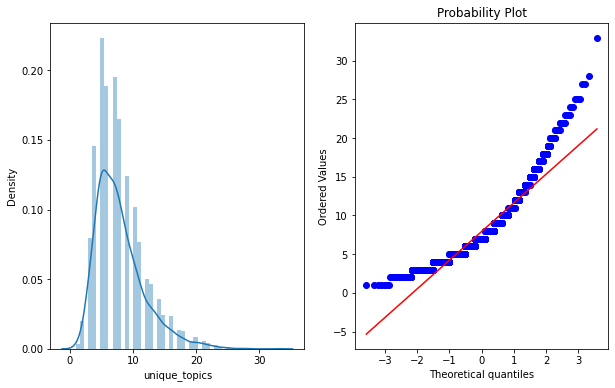

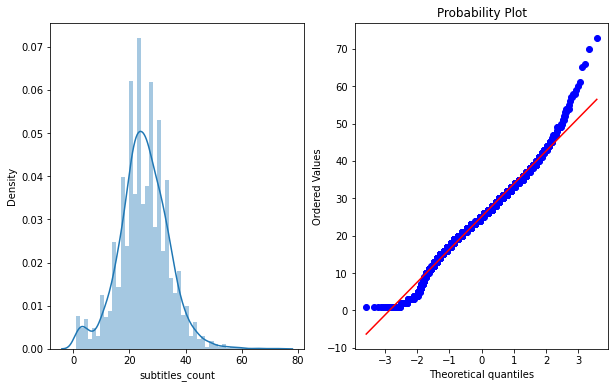

In [ ]:
for column in DF:
  to_plot(column)

Before Transformation


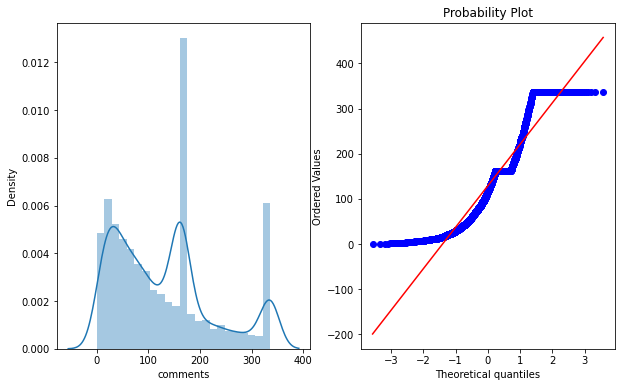

After Transformation


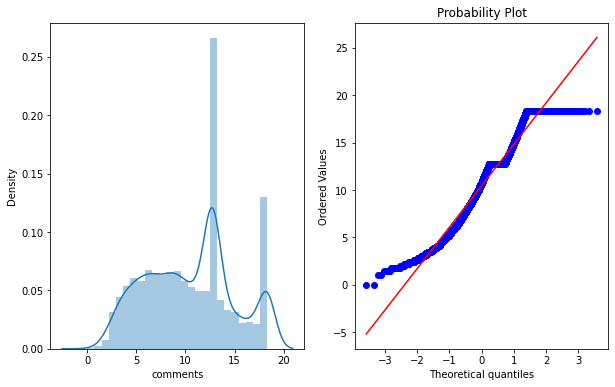

Before Transformation


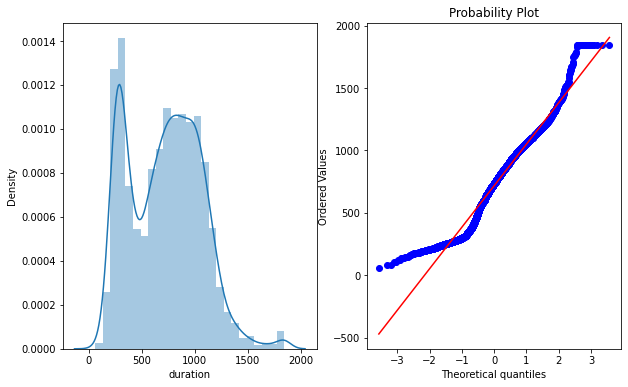

After Transformation


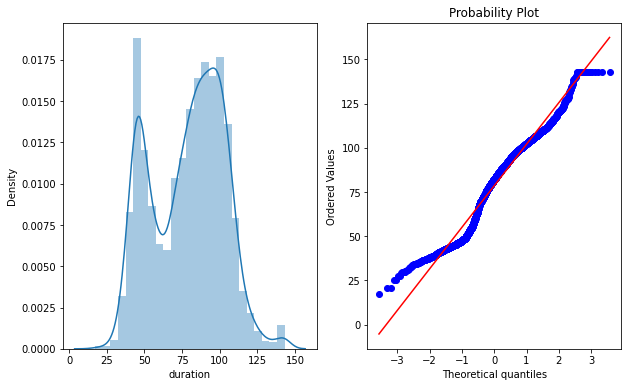

Before Transformation


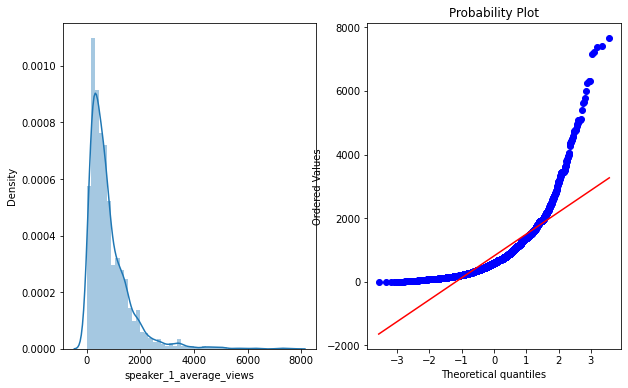

After Transformation


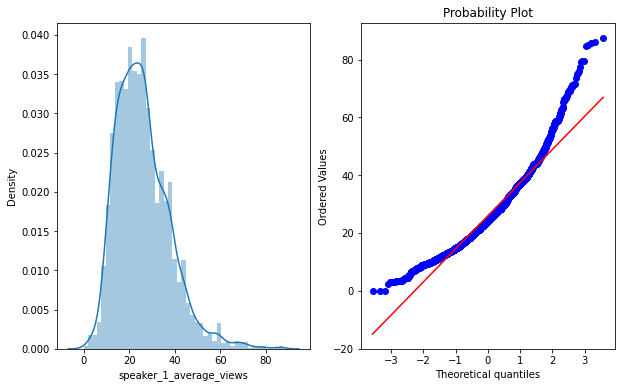

Before Transformation


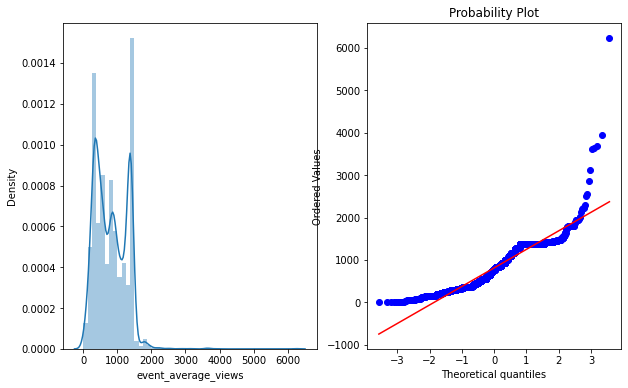

After Transformation


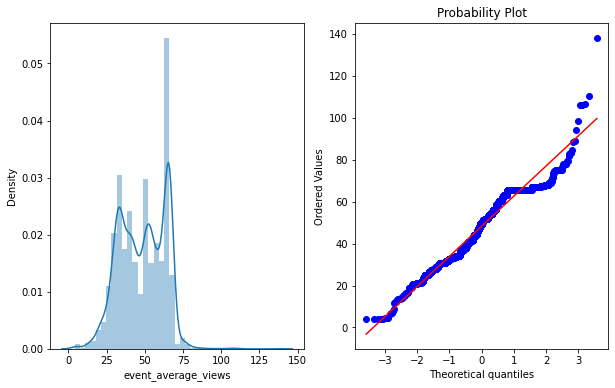

Before Transformation


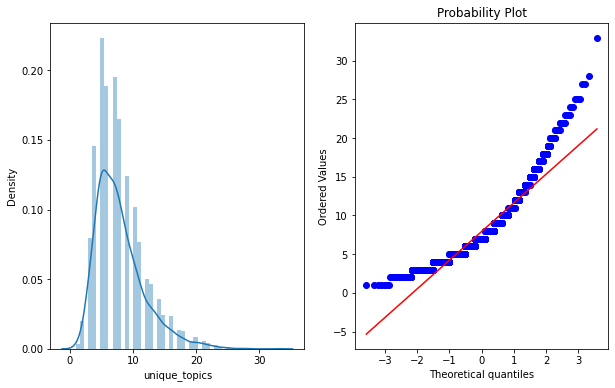

After Transformation


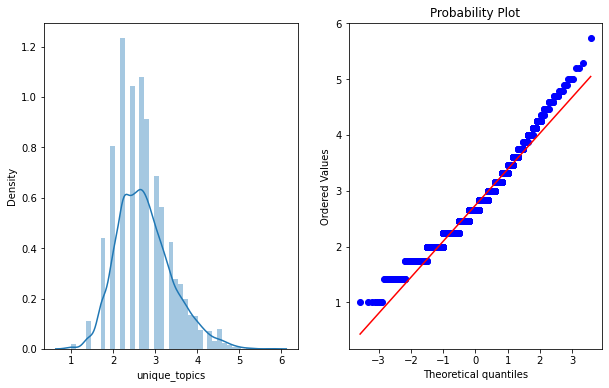

In [ ]:

square_root_transform('comments')
box_cox_transform('duration')

square_root_transform('speaker_1_average_views')
box_cox_transform('event_average_views')

square_root_transform('unique_topics')



After applying the transformation and treating with VIF factor checking again for correlation.

In [ ]:
DF.head()
#Which does not contain categorical and dependent variable


comments    duration  video_age  speaker_1_average_views  \
0  16.492423   97.610498       5998                22.560602   
1  11.135529  115.142920       5998                22.841329   
2  14.798649  105.741599       5998                19.248990   
3   6.928203  110.344336       5985                14.054599   
4  18.330303   98.509736       5985                28.196116   

   event_average_views  topics_wise_avg_views  unique_topics  subtitles_count  
0            33.301625                  666.0       3.000000               43  
1            33.301625                  603.0       3.000000               26  
2            33.301625                  662.0       3.000000               35  
3            33.301625                  650.0       2.236068               19  
4            33.301625                  792.0       3.000000               31

In [ ]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
DF.drop('event_average_views',axis=1,inplace=True)
#Strong correlation 
DF.drop('topics_wise_avg_views',axis=1,inplace=True)
DF.drop('subtitles_count',axis=1,inplace=True)


In [ ]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

We saw that event wise average views were highly correlated wih speaker average views, so we tried dropping that out.

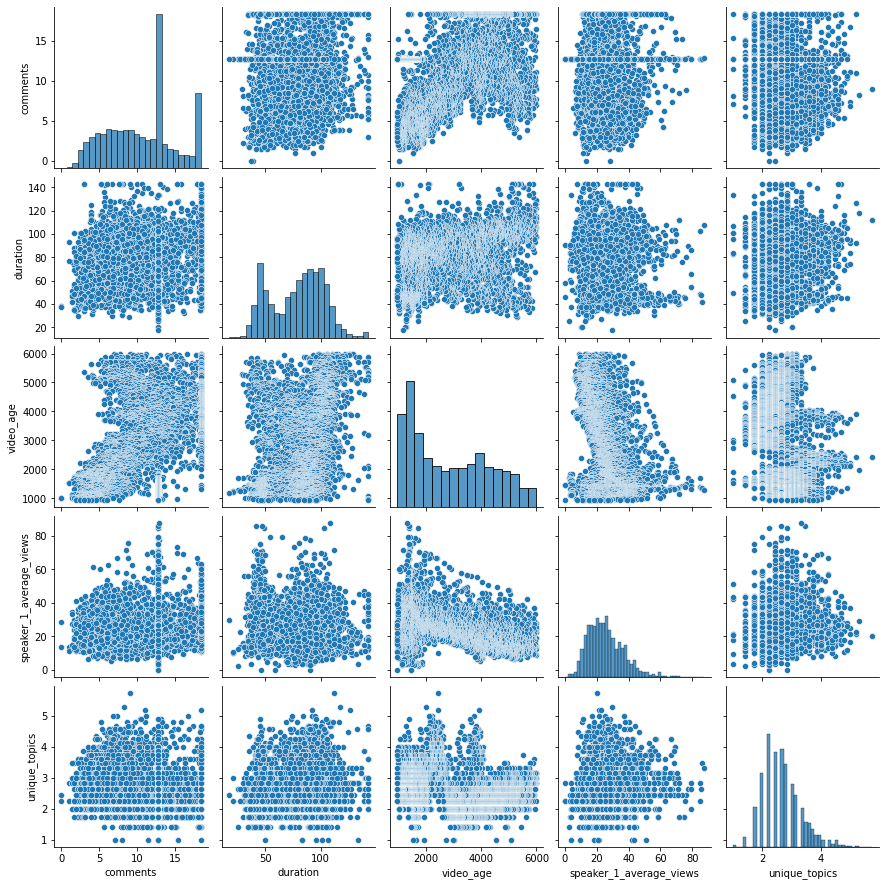

In [ ]:
p = sns.pairplot(DF)

Just tring to visualize the DF after treating with correlation and transformation.

##**One hot Encoding**

DF contains only the numeric columns, so we merge it with the categorical column. And we use One hot encoding to use the categorical columns in a better way.

In [ ]:
DF.columns

Index(['comments', 'duration', 'video_age', 'speaker_1_average_views',
       'unique_topics'],
      dtype='object')

In [ ]:
features_df = DF.copy()

In [ ]:
features_df['release_day'] = df['release_day']
features_df['release_month'] = df['release_month']
features_df['release_year'] = df['release_year']

In [ ]:
features_df.head(2)

comments    duration  video_age  speaker_1_average_views  unique_topics  \
0  16.492423   97.610498       5998                22.560602            3.0   
1  11.135529  115.142920       5998                22.841329            3.0   

  release_day release_month  release_year  
0     Tuesday          June          2006  
1     Tuesday          June          2006

In [ ]:
features_df = pd.get_dummies(features_df, columns=['release_day', 'release_month', 'release_year'])

In [ ]:
features_df.head(2)

comments    duration  video_age  speaker_1_average_views  unique_topics  \
0  16.492423   97.610498       5998                22.560602            3.0   
1  11.135529  115.142920       5998                22.841329            3.0   

   release_day_Friday  release_day_Monday  release_day_Saturday  \
0                   0                   0                     0   
1                   0                   0                     0   

   release_day_Sunday  release_day_Thursday  ...  release_year_2011  \
0                   0                     0  ...                  0   
1                   0                     0  ...                  0   

   release_year_2012  release_year_2013  release_year_2014  release_year_2015  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   release_year_2020  
0                  0  
1                  0  

[2 rows x 39 columns]

##**Min max scaler**

Now everything is done except normalization, we need to have the that in same standards to get optimized results for the models. So we use Min max scaler

In [ ]:
#Min max scaler


column_names = list(features_df.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features_df)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(features_df))
DF_scaled.columns = column_names

In [ ]:
DF_scaled.head()

comments  duration  video_age  speaker_1_average_views  unique_topics  \
0  0.899735  0.638816   1.000000                 0.257447       0.421535   
1  0.607493  0.778386   1.000000                 0.260651       0.421535   
2  0.807332  0.703545   1.000000                 0.219657       0.421535   
3  0.377964  0.740186   0.997429                 0.160382       0.260523   
4  1.000000  0.645974   0.997429                 0.321756       0.421535   

   release_day_Friday  release_day_Monday  release_day_Saturday  \
0                 0.0                 0.0                   0.0   
1                 0.0                 0.0                   0.0   
2                 0.0                 0.0                   0.0   
3                 0.0                 1.0                   0.0   
4                 0.0                 1.0                   0.0   

   release_day_Sunday  release_day_Thursday  ...  release_year_2011  \
0                 0.0                   0.0  ...                0.0   
1                 0.0                   0.0  ...                0.0   
2                 0.0                   0.0  ...                0.0   
3                 0.0                   0.0  ...                0.0   
4                 0.0                   0.0  ...                0.0   

   release_year_2012  release_year_2013  release_year_2014  release_year_2015  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   release_year_2020  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 39 columns]

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   video_age                3945 non-null   int64  
 3   speaker_1_average_views  3945 non-null   float64
 4   unique_topics            3945 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 154.2 KB


In [ ]:
#DF = DF[['comments', 'duration','speaker_1_average_views','unique_topics']]

# **Dependednt variable**

All the normalization and transformations were done only for the independent variables. Now we try doing the same for dependent variable as well to get better result for our model

In [ ]:
df['views_per_day'].describe()

count    3945.000000
mean      814.454855
std       869.336548
min         0.000000
25%       273.893752
50%       550.189943
75%      1065.441196
max      8621.370933
Name: views_per_day, dtype: float64

In [ ]:
# Transforming dependent variable

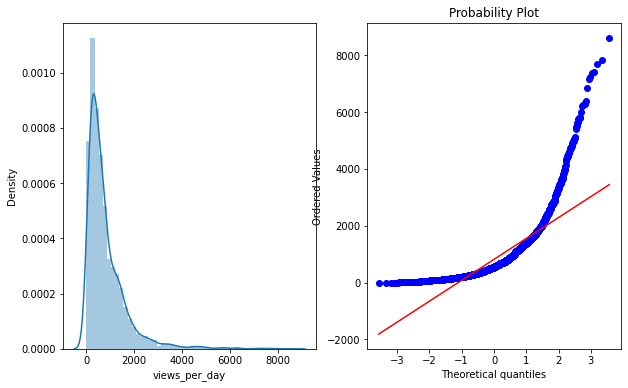

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['views_per_day'])
plt.subplot(1,2,2)
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
plt.show()

In [ ]:

def plot_(col):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(col)
  plt.subplot(1,2,2)
  stats.probplot(col,dist='norm',plot=pylab)
  plt.show()


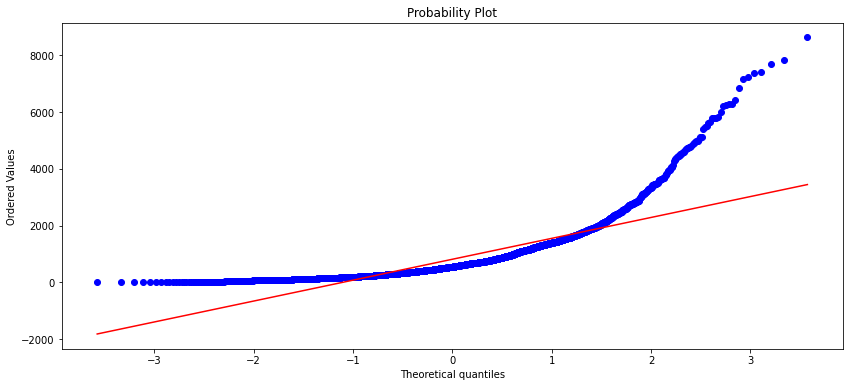

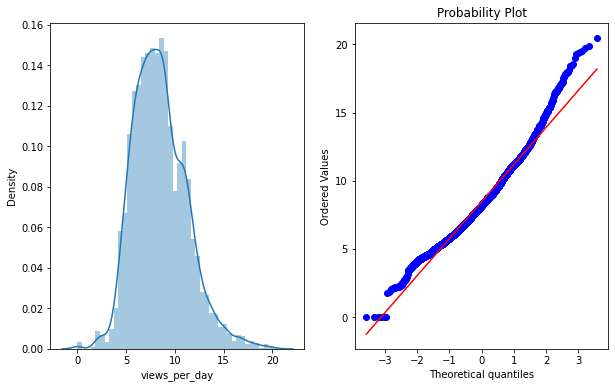

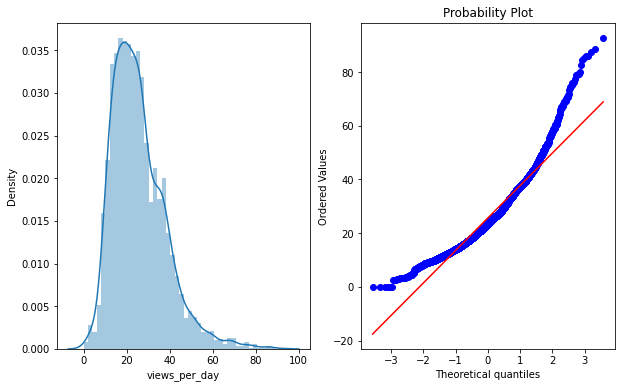

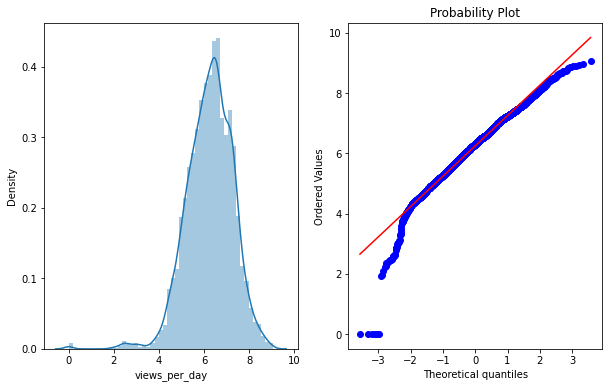

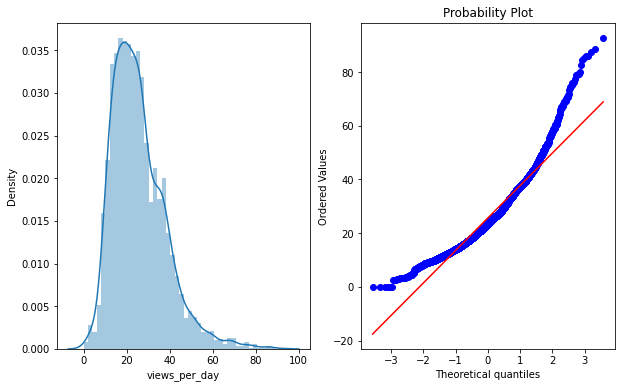

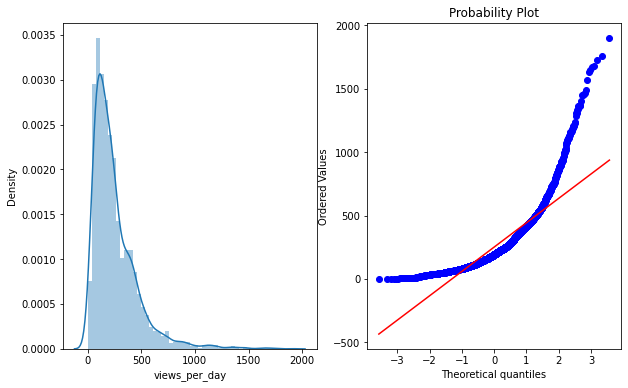

In [ ]:
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
y1 = np.power(df['views_per_day'],1/3)
plot_(y1)
y2=np.power(df['views_per_day'],1/2)
plot_(y2)
y3=np.log1p(df['views_per_day'])
plot_(y3)
#y4=stats.boxcox(df['views_per_day'])
y5=df['views_per_day']**(1/2)
plot_(y5)
y6=df['views_per_day']**(1/1.2)
plot_(y6)




In [ ]:
# df['views_per_day'] = np.power(df['views_per_day'],1/3)
# plot_(df['views_per_day'])

Now our our data is all set to build model. Before that lets just do the train and test split.

# **Train and test split**

We have already taken the dependent variable seperately, lets just equate it into y and X has ll the indeoendent variables.

In [ ]:
df.head(2)
y = y1
X = DF_scaled

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.25, random_state= 0)



#**Model building**

In [ ]:
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble


In [ ]:
def Calculating_errors(y_train,y_pred_train,y_test,y_test_pred):
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is" ,MSE_test)
  MSE_train  = mean_squared_error(y_train, y_pred_train)
  print("MSE on train is" ,MSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is" ,RMSE_test)
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is" ,RMSE_train)
  print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
  print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))


# **Linear regression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,lin_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,lin_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8704
The r2 score for training is 0.852


In [ ]:
y_pred_train_reg =lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)


In [ ]:
Calculating_errors(y_train,y_pred_train_reg,y_test,y_test_pred_reg)

MSE on test is 1.0118510329150967
MSE on train is 1.1050471395397252
RMSE on test is 1.0059080638483304
RMSE on train is 1.0512122238348094
Training MAE: 0.57
Test MAE: 0.57


# **Regularized linear regression**

In [ ]:
!pip install catboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,StackingRegressor


In [ ]:
elastic_param = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                }

In [ ]:
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                       param_grid = elastic_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
elastic_grid.fit(X_train,y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=9,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_elastic = elastic_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_elastic.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_elastic.predict(X_train)),4)}")

The r2 score for testing is 0.8711
The r2 score for training is 0.8519


In [ ]:
y_pred_train_ela = optimal_elastic.predict(X_train)
y_test_pred_ela = optimal_elastic.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_pred_train_ela,y_test,y_test_pred_ela)

MSE on test is 1.006268617275306
MSE on train is 1.105918371689571
RMSE on test is 1.003129412027833
RMSE on train is 1.051626536223564
Training MAE: 0.57
Test MAE: 0.57


# **Random Forest**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,rf.predict(X_train)),4)}")

The r2 score for testing is 0.8445
The r2 score for training is 0.9738


In [ ]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_rf,y_test,y_test_pred_rf)

MSE on test is 1.2141809985299794
MSE on train is 0.19549709201333673
RMSE on test is 1.1018988150143276
RMSE on train is 0.44215053094318085
Training MAE: 0.22
Test MAE: 0.58


# **Optimal Random forest**

In [ ]:
rf_param = {
            'n_estimators':[100,250,500],
            'max_depth':[2,4,5,6],
            'max_leaf_nodes':[150]
           }

In [ ]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid = rf_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=9,
             param_grid={'max_depth': [2, 4, 5, 6], 'max_leaf_nodes': [150],
                         'n_estimators': [100, 250, 500]},
             scoring='r2', verbose=2)

In [ ]:
optimal_rf = rf_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_rf.predict(X_train)),4)}")

The r2 score for testing is 0.8684
The r2 score for training is 0.8773


In [ ]:
y_train_pred_optimal_rf = optimal_rf.predict(X_train)
y_test_pred_optimal_rf = optimal_rf.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optimal_rf,y_test,y_test_pred_optimal_rf)

MSE on test is 1.0279177380319484
MSE on train is 0.9162916951039597
RMSE on test is 1.0138627806719942
RMSE on train is 0.9572312652143993
Training MAE: 0.45
Test MAE: 0.49


# **CatBoost** **Regression**

In [ ]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)

Learning rate set to 0.048596
0:	learn: 2.6397351	total: 49.1ms	remaining: 49s
1:	learn: 2.5485385	total: 51.4ms	remaining: 25.6s
2:	learn: 2.4625431	total: 53.4ms	remaining: 17.7s
3:	learn: 2.3800391	total: 56.3ms	remaining: 14s
4:	learn: 2.3000702	total: 58.1ms	remaining: 11.6s
5:	learn: 2.2278341	total: 60.1ms	remaining: 9.95s
6:	learn: 2.1572420	total: 61.9ms	remaining: 8.77s
7:	learn: 2.0905730	total: 63.6ms	remaining: 7.89s
8:	learn: 2.0271702	total: 65.5ms	remaining: 7.22s
9:	learn: 1.9651245	total: 67.6ms	remaining: 6.69s
10:	learn: 1.9076582	total: 69.5ms	remaining: 6.25s
11:	learn: 1.8551655	total: 71.6ms	remaining: 5.89s
12:	learn: 1.8061767	total: 73.6ms	remaining: 5.59s
13:	learn: 1.7544242	total: 75.6ms	remaining: 5.33s
14:	learn: 1.7115086	total: 77.7ms	remaining: 5.1s
15:	learn: 1.6673373	total: 79.8ms	remaining: 4.9s
16:	learn: 1.6298832	total: 81.5ms	remaining: 4.71s
17:	learn: 1.5899078	total: 83.4ms	remaining: 4.55s
18:	learn: 1.5504321	total: 85.5ms	remaining: 4.41

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,cat_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,cat_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8799
The r2 score for training is 0.9622


In [ ]:
y_train_pred_cat = cat_reg.predict(X_train)
y_test_pred_cat = cat_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_cat,y_test,y_test_pred_cat)

MSE on test is 0.938084878670193
MSE on train is 0.2822539717740363
RMSE on test is 0.9685478195061888
RMSE on train is 0.531275796337492
Training MAE: 0.32
Test MAE: 0.56


# **Optimal** **catboost** **regressor**

In [ ]:
cat_param = {'depth': [2,4,5],
             'learning_rate' : [0.01,0.05,0.1],
             'iterations'    : [150,200]
            }

In [ ]:
ct_grid = GridSearchCV(estimator=cat_reg,
                       param_grid = cat_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
ct_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 2.6369346	total: 1.64ms	remaining: 327ms
1:	learn: 2.5476268	total: 2.99ms	remaining: 296ms
2:	learn: 2.4655371	total: 4.73ms	remaining: 310ms
3:	learn: 2.3899335	total: 6.37ms	remaining: 312ms
4:	learn: 2.3043220	total: 7.98ms	remaining: 311ms
5:	learn: 2.2251312	total: 9.55ms	remaining: 309ms
6:	learn: 2.1538844	total: 11.1ms	remaining: 307ms
7:	learn: 2.0885909	total: 12.7ms	remaining: 305ms
8:	learn: 2.0258159	total: 14.3ms	remaining: 303ms
9:	learn: 1.9664829	total: 15.9ms	remaining: 301ms
10:	learn: 1.9081394	total: 17.4ms	remaining: 299ms
11:	learn: 1.8532457	total: 19ms	remaining: 297ms
12:	learn: 1.8023247	total: 20.5ms	remaining: 295ms
13:	learn: 1.7540555	total: 22.2ms	remaining: 294ms
14:	learn: 1.7070895	total: 23.7ms	remaining: 293ms
15:	learn: 1.6649194	total: 25.3ms	remaining: 291ms
16:	learn: 1.6239881	total: 26.8ms	remaining: 289ms
17:	learn: 1.5832051	total: 28.4ms	remaining: 287ms
18:	learn: 1.54

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f88dc750e90>,
             n_jobs=9,
             param_grid={'depth': [2, 4, 5], 'iterations': [150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_cat = ct_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_cat.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_cat.predict(X_train)),4)}")

The r2 score for testing is 0.882
The r2 score for training is 0.8908


In [ ]:
y_train_pred_optcat = optimal_cat.predict(X_train)
y_test_pred_optcat = optimal_cat.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optcat,y_test,y_test_pred_optcat)

MSE on test is 0.9216260560063496
MSE on train is 0.8155037699759261
RMSE on test is 0.9600135707407211
RMSE on train is 0.9030524735451014
Training MAE: 0.47
Test MAE: 0.52


# **XG** **Boost** **Regression**

In [ ]:
xgb_reg = XGBRegressor()

In [ ]:
xgb_reg.fit(X_train,y_train)

[05:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8746
The r2 score for training is 0.8929


In [ ]:
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MSE on test is 0.9789900150529542
MSE on train is 0.7998227504780635
RMSE on test is 0.989439242729413
RMSE on train is 0.8943281000159078
Training MAE: 0.46
Test MAE: 0.53


# **Optimaized XGboost**

In [ ]:
xgb_param = {'n_estimators': [50,100,150,200],
            'max_depth': [2,4,5,10],
            'learning_rate':[0.01,0.05,0.1]
            }

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb_reg,
                       param_grid = xgb_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[05:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=9,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2', verbose=2)

In [ ]:
optimal_xgb = xgb_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_xgb.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_xgb.predict(X_train)),4)}")

The r2 score for testing is 0.8748
The r2 score for training is 0.9172


In [ ]:
y_train_pred_optxgb = optimal_xgb.predict(X_train)
y_test_pred_optxgb = optimal_xgb.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optxgb,y_test,y_test_pred_optxgb)

MSE on test is 0.9777308226180208
MSE on train is 0.6181441788439803
RMSE on test is 0.988802721789347
RMSE on train is 0.7862214566163788
Training MAE: 0.41
Test MAE: 0.54


# **LGBM**

In [ ]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train,y_train)

LGBMRegressor()

In [ ]:
r2_score(y_train,lgbm_reg.predict(X_train))

0.9464061350109962

In [ ]:
r2_score(y_test,lgbm_reg.predict(X_test))

0.876124615724494

In [ ]:
y_train_pred_lgbm = lgbm_reg.predict(X_train)
y_test_pred_lgbm = lgbm_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_lgbm,y_test,y_test_pred_lgbm)

MSE on test is 0.9673590808701505
MSE on train is 0.4001809588582315
RMSE on test is 0.983544142817266
RMSE on train is 0.6325985763959887
Training MAE: 0.36
Test MAE: 0.55


# **Optimal LGBM**

In [ ]:
lgbm_param = {
              "n_estimators" :[50,100,150],
              'num_leaves': [6,8,12,16],
              "max_depth": [2,4,5],
              "learning_rate": [0.01,0.05,0.1]
              }

In [ ]:
lgbm_grid = GridSearchCV(estimator=lgbm_reg,
                       param_grid = lgbm_param,n_jobs=6,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
lgbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5], 'n_estimators': [50, 100, 150],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='r2', verbose=2)

In [ ]:
lgbm_optimal = lgbm_grid.best_estimator_

In [ ]:
r2_score(y_test,lgbm_optimal.predict(X_test))

0.881682069958426

In [ ]:
r2_score(y_train,lgbm_optimal.predict(X_train))

0.8997245898271891

In [ ]:
y_train_pred_lgbm_optimal = lgbm_optimal.predict(X_train)
y_test_pred_lgbm_optimal = lgbm_optimal.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_lgbm_optimal,y_test,y_test_pred_lgbm_optimal)

MSE on test is 0.9239601937453458
MSE on train is 0.7487481972253984
RMSE on test is 0.9612284815512625
RMSE on train is 0.8653023732923645
Training MAE: 0.45
Test MAE: 0.51


# **Extra** **Tree** **Regression**

In [ ]:
extra_tree_reg = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
extra_tree_reg.fit(X_train, y_train)

ExtraTreesRegressor(criterion='mae', max_depth=30, min_samples_leaf=2,
                    min_samples_split=6, n_estimators=200)

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,extra_tree_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,extra_tree_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8797
The r2 score for training is 0.942


In [ ]:
y_train_pred_extra = extra_tree_reg.predict(X_train)
y_test_pred_extra = extra_tree_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_extra,y_test,y_test_pred_cat)

MSE on test is 0.938084878670193
MSE on train is 0.43276036682460467
RMSE on test is 0.9685478195061888
RMSE on train is 0.6578452453462019
Training MAE: 0.26
Test MAE: 0.56


# **Optimal** **Extra** **Tree** **Regression**

In [ ]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  18.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  17.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  19.9s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  18.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  17.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  18.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  17.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  18.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  17.8s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
et_optimal_model = et_random.best_estimator_

In [ ]:
y_train_pred_etopt = et_optimal_model.predict(X_train)
y_test_pred_etopt = et_optimal_model.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_etopt,y_test,y_test_pred_etopt)

MSE on test is 1.2608371389312936
MSE on train is 1.3261981656865764
RMSE on test is 1.122870045433261
RMSE on train is 1.1516067756341903
Training MAE: 0.66
Test MAE: 0.67


In [ ]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8223901365940545
For test the R_Squared for ExtraTreesRegressor is 0.8385432171128719 and adjusted R_Squared is 0.8369307165923603


# **Comparing all models with model performance**

In [ ]:
regressors = [optimal_elastic,optimal_rf,optimal_cat,xgb_reg,lgbm_optimal,et_optimal_model]
reg_names = ['Regularized Linear regression','RandomForest','CatBoost','XGBoost','LGBM','Extra tree regressor']
training,testing = [],[]
for i in regressors:
    tr = round(r2_score(y_train,i.predict(X_train)),3)
    ts = round(r2_score(y_test,i.predict(X_test)),3)
    training.append(tr)
    testing.append(ts)

In [ ]:
diff = np.array(training)-np.array(testing)


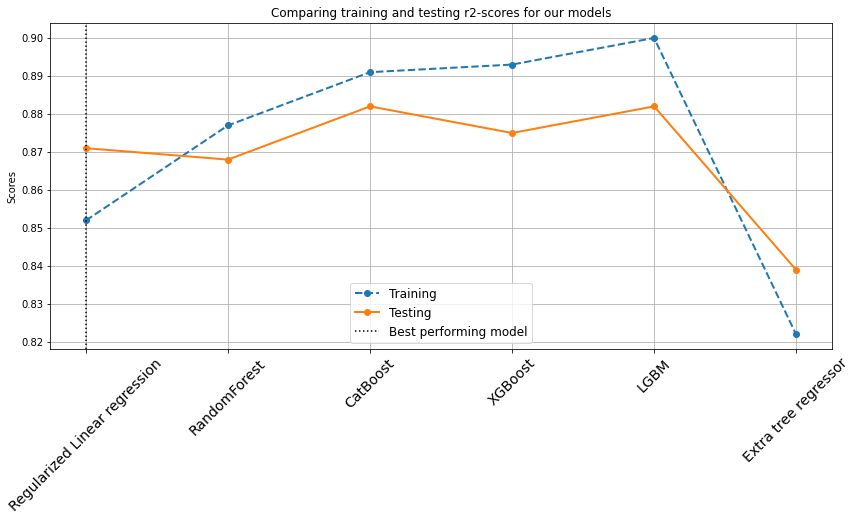

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(regressors)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(regressors)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(regressors)), reg_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing r2-scores for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can observe that our modt models are overfitting, they performed alot better in traing but their performance is poor in testing. But comparitvely Regularized linear regression is performing well in traing and testing.

##**Evaluation metric for all models (in comaprision)**

In [ ]:
#Defining all the models
models = [
           ['Regularized Linear Regression', elastic_grid.best_estimator_],
           ['Optimal Random Forest ', rf_grid.best_estimator_],
           ['LGBM ', lgbm_grid.best_estimator_],
           ['Catboost ',  ct_grid.best_estimator_],
           ['XGBoost ',xgb_reg],    
           ['Extra tree regressor ', et_random.best_estimator_]          
        ]

In [ ]:
#Let's run all the models and store the scores
model_1_data = []
for name,model in models :
    model_data = {}
    model.random_state = 42
    model_data["Name"] = name
    model.fit(X_train,y_train)
    model_data["MAE_train"] = round(metrics.mean_absolute_error(y_train, model.predict(X_train)),4)
    model_data["MAE_test"] = round(metrics.mean_absolute_error(y_test, model.predict(X_test)),4)
    model_data["MSE_train"] = round(metrics.mean_squared_error(y_train, model.predict(X_train)),4)
    model_data["MSE_test"] = round(metrics.mean_squared_error(y_test, model.predict(X_test)),4)
    model_data["R2_Score_train"] = round(r2_score(y_train,model.predict(X_train)),4)
    model_data["R2_Score_test"] = round(r2_score(y_test,model.predict(X_test)),4)
    model_data['Adjusted_R2_score_train'] = 1 - (1-(r2_score(y_train,model.predict(X_train))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    model_data['Adjusted_R2_score_test'] = 1 - (1-(r2_score(y_test,model.predict(X_test))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    model_data["RMSE_Score_train"] = round(np.sqrt(mean_squared_error(y_train,model.predict(X_train))),4)
    model_data["RMSE_Score_test"] = round(np.sqrt(mean_squared_error(y_test,model.predict(X_test))),4)
    model_1_data.append(model_data)

0:	learn: 2.6369346	total: 1.67ms	remaining: 333ms
1:	learn: 2.5476268	total: 3.07ms	remaining: 304ms
2:	learn: 2.4655371	total: 4.38ms	remaining: 288ms
3:	learn: 2.3899335	total: 5.83ms	remaining: 286ms
4:	learn: 2.3043220	total: 7.47ms	remaining: 291ms
5:	learn: 2.2251312	total: 9.04ms	remaining: 292ms
6:	learn: 2.1538844	total: 10.6ms	remaining: 293ms
7:	learn: 2.0885909	total: 12.2ms	remaining: 293ms
8:	learn: 2.0258159	total: 13.8ms	remaining: 292ms
9:	learn: 1.9664829	total: 15.3ms	remaining: 291ms
10:	learn: 1.9081394	total: 16.9ms	remaining: 290ms
11:	learn: 1.8532457	total: 18.5ms	remaining: 290ms
12:	learn: 1.8023247	total: 20.1ms	remaining: 290ms
13:	learn: 1.7540555	total: 21.7ms	remaining: 288ms
14:	learn: 1.7070895	total: 23.2ms	remaining: 287ms
15:	learn: 1.6649194	total: 24.8ms	remaining: 286ms
16:	learn: 1.6239881	total: 26.4ms	remaining: 284ms
17:	learn: 1.5832051	total: 27.9ms	remaining: 283ms
18:	learn: 1.5455769	total: 29.6ms	remaining: 282ms
19:	learn: 1.5108879	t

In [ ]:
results = pd.DataFrame(model_1_data)
results

Name  MAE_train  MAE_test  MSE_train  MSE_test  \
0  Regularized Linear Regression     0.5660    0.5666     1.1059    1.0063   
1         Optimal Random Forest      0.4542    0.4945     0.9162    1.0289   
2                          LGBM      0.4462    0.5132     0.7487    0.9240   
3                      Catboost      0.4653    0.5186     0.8155    0.9216   
4                       XGBoost      0.4551    0.5299     0.7998    0.9790   
5          Extra tree regressor      0.6446    0.6519     1.3394    1.2889   

   R2_Score_train  R2_Score_test  Adjusted_R2_score_train  \
0          0.8519         0.8711                 0.850412   
1          0.8773         0.8682                 0.876074   
2          0.8997         0.8817                 0.898723   
3          0.8908         0.8820                 0.889694   
4          0.8929         0.8746                 0.891815   
5          0.8206         0.8349                 0.818837   

   Adjusted_R2_score_test  RMSE_Score_train  RMSE_Score_test  
0                0.869855            1.0516           1.0031  
1                0.866922            0.9572           1.0144  
2                0.880500            0.8653           0.9612  
3                0.880802            0.9031           0.9600  
4                0.873383            0.8943           0.9894  
5                0.833301            1.1573           1.1353

# After comparing all the models we can conclude that **Optimal Random Forest and aswell as Extra Tree** is the best performer. 